# 1. Defining the problem and assembling a dataset


The dataset we're working with is the American Sign Language (ASL) Alphabet MNIST dataset obtained from Kaggle. Dataset taken from: https://www.kaggle.com/datasets/datamunge/sign-language-mnist. It comprises hand gestures representing letters of the American Sign Language alphabet. This dataset consists of 24 classes of letters, ecluding J and Z, which require motion.

**Dataset Description:**
- The dataset consists of approximately 27,455 training cases and 7,172 test cases.
- Each row in the dataset represent a single 28x28 pixel image, with grayscale values ranging from 0 to 255.
- The dataset is structured with a header row containing the label and pixel values.

**Problem Statement:**

The goal of this project is to develop a machine learning model capable of recognizing hand gestures corresponding to letters of the ASL alphabet. This is a multiclass classification problem, where the model needs to classify each image into one of the 24 classes representing the letters A to Y.

**Hypothese Approach: Fixed Arcitecture**
1. Simpler Neural Network Architecture
  - We hypothesize that a simpler neural network architecture with fewer hidden layers and neurons may achieve satisfactory performance. This approach aims to strike a balance between model complexity and generalisation.

2. Rgularisation Techniques
  - To prevent overfitting in a simple a simpler architecture, we plan to employ regularisation techniques such as dropout. Dropout randomly drop a fraction of neirons during training, which can help prevent the model from relying too heavily on specific features.

3. Hyperparameter
  - We will then explore tuning the hyperparameters like dropout rate, batch size, learning rate, and activation functions. These hyperparameters can significantly impact model performance and need to be carefully optimised.

Aim to develop a robust machine learning model for recognising ASL alphabet hand gestures. By experimenting with different architectural configurations and hyperparameters, we hope to achieve optimal performance while ensuring the model's generalisation ability.

Below is an image for reference.

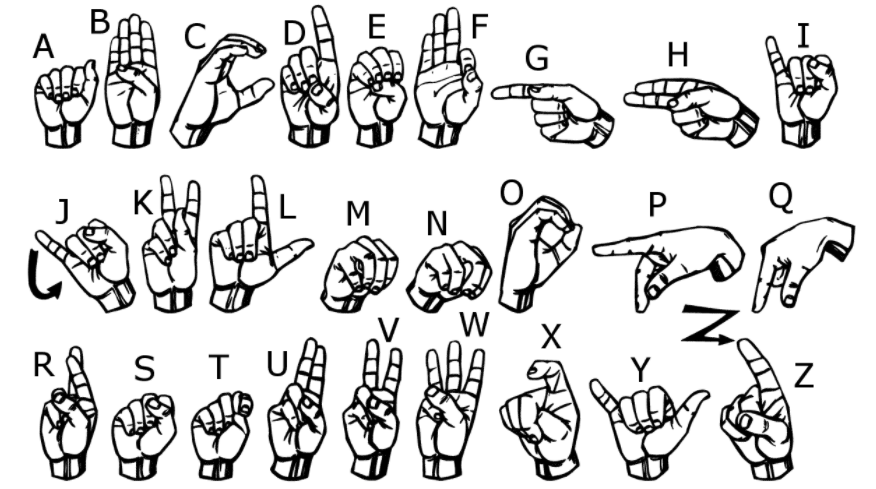

In [ ]:
from IPython.display import Image

# Display the image
Image("/content/drive/MyDrive/MachineLearningFinals/americanSignLanguage.PNG")

# 2. Choosing a measure of success
While there are various metrics available for evaluating model performance, such as precision, recall, AUC, and F1 score, the primary measure of success for this project will be accuracy. Accuracy represents the proportion of correctly classified instances among all instances evaluated and serves as a fundamental metric for assessing the performance of the model in predicting hand gesture in American Sign Language.

**Rationale:**
- Focus on Accuracy
  - Given the nature of the problem and the goal of accurately recognising hand gestures, prioritising accuracy as the primary measure on achieving high accuracy for the prediction of hand gesture in American Sign Language.

**Considerations:**
- Balanced-Classification Context
  - Where each class (letter) is equally likely, accuracy provides a reliable indication of overall model performance. However, it's essential to consider additional metrics such as precision, recall and F1 score, especially when my dataset is considerbly an imbalanced dataset or when there are specific types of errors which will carry higher concequences.

While accuracy serves as the primary evaluation metric, we remain open to considering other performance metrics to gain a comprehensive understanding of the model's effectiveness.



# 3. Decising on an evaluation protocol
When determining how to measure progress in model development, it is crucial to select an appropriate evaluation protocol. Below will be the three common approaches that are typically  considered.

1. Hold-Out Validation
  - This method is preferred when ample of data is available. It involves partitioning the dataset into training and validation sets, allowing for model assessment on unseen data.
2. K-Fold Cross-Validation
  - Especiallly when the data is limited and hold-out validation proves unreliable, K-fold cross-validation offers a viable alternative. It involves dividing the dataset into K subsets, training the model K times while using a different subset as the validation set each time.
3. Iterated K-Fold Validation
  - This is more suitable for highly accurate model evaluation despite limited data availability, iterated K-fold validation presents an enhanced approach. It involves repeating the K-fold cross-validation process multiple time to further reduce variance in performance estimates.

With all that, we have decided to go with in the order of using hold-out validation, then k-fold cross-validation and lastly iterated k-fold validation. However we will prioritise using hold-out validation as it is one of the most sufficient validation for most models. However, out dataset might be on a smaller side, hence we need k-fold cross-validation to back it up.

# 4. Preparing your dataset

Importing the necessary libraries to be used in the project, we have downloaded a zip file from the above Kaggle link which is where we have gotten our dataset from. All the information and datasets are placed in the other folder. As well as extracting the data from the relevant files is shown below.

In [1]:
# Importing libraries
import numpy as np     # Linear algrebra
import pandas as pd    # Data processing
import random as rd
from scipy import constants
from scipy import stats

# Data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from PIL import Image
from tabulate import tabulate

# Google drive
from google.colab import drive

# For the model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import keras
from keras import regularizers
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.metrics import F1Score, AUC
# WHy use stratified KFold
from sklearn.model_selection import StratifiedKFold



# Setting seed for reproducability
from numpy.random import seed
seed(10)
tf.random.set_seed(20)

# Mount google drive
drive.mount('/content/drive')

# File path to the dataset
train_file_path = '/content/drive/MyDrive/MachineLearningFinals/SignMnistTrain.csv'
test_file_path = '/content/drive/MyDrive/MachineLearningFinals/SignMnistTest.csv'

# Read the dataset into a Pandas DataFrame
training = pd.read_csv(train_file_path)
testing = pd.read_csv(test_file_path)

# test = pd.read_csv('/content/drive/MyDrive/MachineLearningFinals/SignMnistTest.csv')
# y = test['label']

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [2]:
# Reduce the verbosity of TensorFlow's logging output
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

Below is ensuring that there is no null values or NaN in our dataset. If there is, we might need to preprocess the datasets.

In [3]:
# Summing the number of na in the training set for each column
print(sum(training.isna().sum()))

# Summing the number of na in the test set for each column
print(sum(testing.isna().sum()))

0
0


In [4]:
# Summing the number of null values in the training set for each column
print(sum(training.isnull().sum()))

# Summing the number of null values in the test set for each column
print(sum(testing.isnull().sum()))

0
0


## Data visualising and preprocessing

Creating class names so that we can match the names with the labels.

In [5]:
# class names are only 24 because we have removed alphabets J and Z.
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P',
               'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

These plots are created to show the matches between the class names with the label to ensure that the shape is correct and that the number of classes we have is correct.

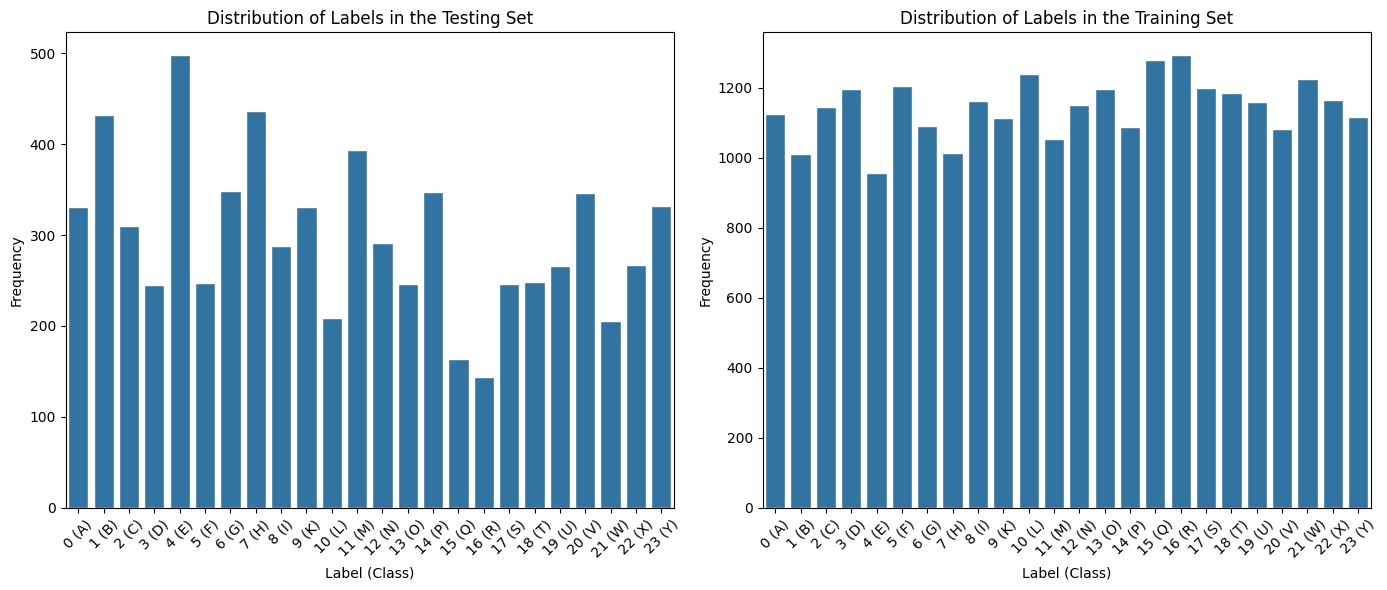

In [6]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot for code 1
plt.sca(axes[1])
sns.set_style("darkgrid")
sns.set_palette("deep")
sns.countplot(data=training, x='label')
plt.title('Distribution of Labels in the Training Set')
plt.xlabel('Label (Class)')
plt.ylabel('Frequency')
tick_positions = range(len(class_names))
plt.xticks(tick_positions, [f"{num} ({name})" for num, name in zip(tick_positions, class_names)], rotation=45)


# Plot for code 2
plt.sca(axes[0])
sns.set_style("darkgrid")
sns.set_palette("deep")
sns.countplot(data=testing, x='label')
plt.title('Distribution of Labels in the Testing Set')
plt.xlabel('Label (Class)')
plt.ylabel('Frequency')
tick_positions = range(len(class_names))
plt.xticks(tick_positions, [f"{num} ({name})" for num, name in zip(tick_positions, class_names)], rotation=45)

plt.tight_layout()
plt.show()

The labels are an array of integers, in the range [0,23]. These corresponds to the class of the alphabets the image represents. As you can see from the plots above in both the testing and training set, alphabets J and Z is not inside the dataset.

Next, we move on to preprocessing the data where:


In [7]:
# Creating our Y for the Training data by extracting the target labels
y_train = training["label"]

# Creating our X train and dropping the column named "label" from the training data
X_train = training.drop(labels=["label"], axis=1)


In [8]:
# Creating our Y for the Test Data by extracting the target labels
y_test = testing["label"]

# Creating our X test and dropping the column named "label" for the testing data
X_test = testing.drop(labels = ["label"], axis=1)

Below is normalising the data that helps in stabilising the learning process and improving convergence during model training.

In [9]:
# Converting the range of the pixel data from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [10]:
# Preparing the image data in a format sutable for input where it is represented as a 3D tensor
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
print(X_train.shape)
print(X_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


The first 5 columns will be for the training data, and the subsequent 5 columns will be for the testing data.

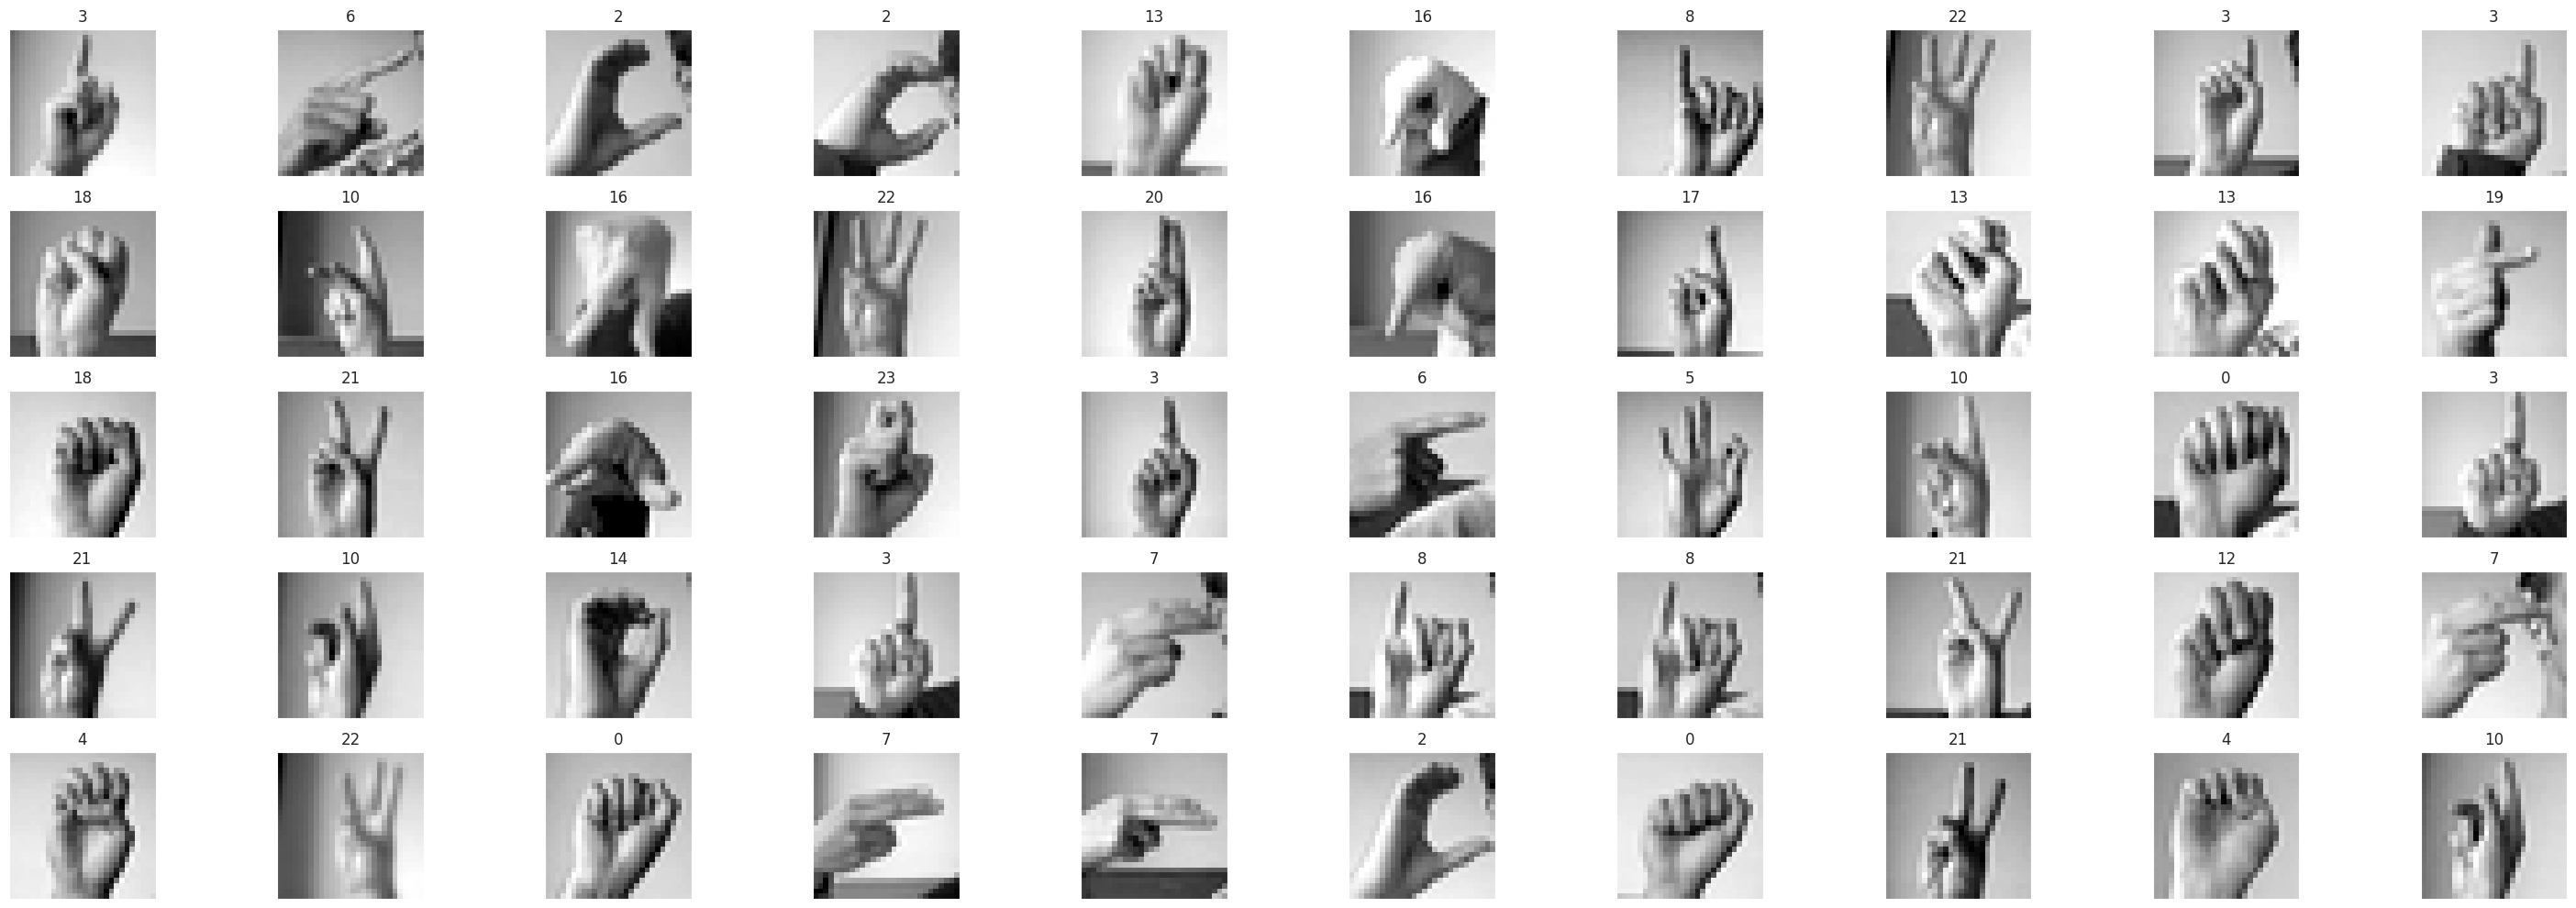

In [11]:

fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(30,10),
                         subplot_kw={'xticks':[], 'yticks':[]})

# Using the Training data
for i in range(25):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])


# Using the Testing data
for i in range(25):
    plt.subplot(5, 10, 26+i)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(y_test[i])


plt.tight_layout()
plt.show()

Hence, from this dataset we will be predicting the type of numerical sign langauge the image belongs to, for example, in the training set, a label of class 3 refers to the alphabet 'D' and in the testing set, a label of class 6 refers to the alphabet 'G'.

Also, the dataset is a multiclass, single-label classification which means that the last-layer activation would be done using softmax and loss function will be calculated using 'categorical_crossentropy'.

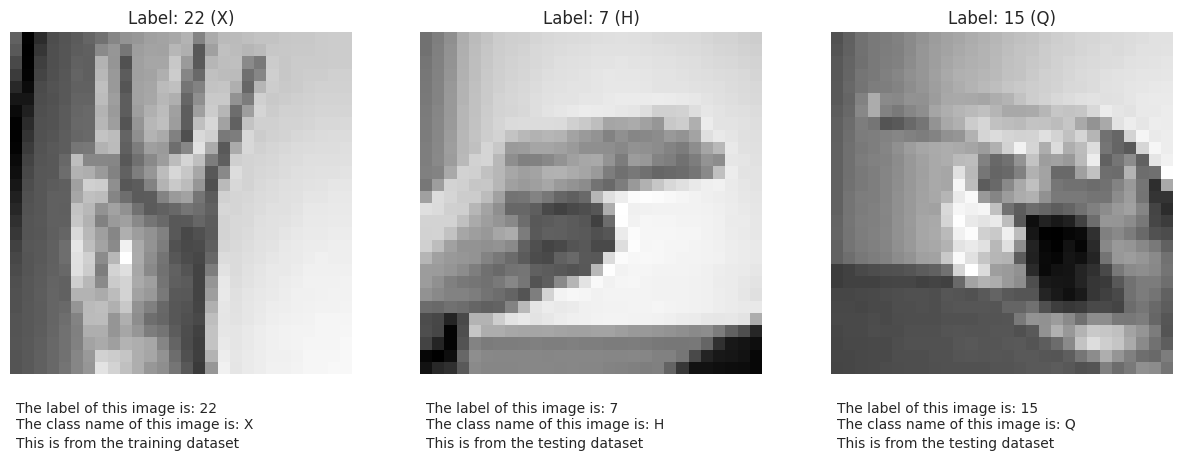

In [12]:
# Define the subplot layout
plt.figure(figsize=(15, 5))

# Plot the image along with its label and class name in the first column
plt.subplot(1, 3, 1)
plt.imshow(X_train[7], cmap='gray')
plt.title(f"Label: {y_train[7]} ({class_names[y_train[7]]})")
plt.text(0, 33.5, "This is from the training dataset", fontsize=10, ha='left')
plt.text(0, 32, f"The label of this image is: {y_train[7]}\nThe class name of this image is: {class_names[y_train[7]]}", fontsize=10, ha='left')
plt.axis('off')

# Plot the second image in the second column
plt.subplot(1, 3, 2)
plt.imshow(X_test[18], cmap='gray')
plt.title(f"Label: {y_test[18]} ({class_names[y_test[18]]})")
plt.text(0, 33.5, "This is from the testing dataset", fontsize=10, ha='left')
plt.text(0, 32, f"The label of this image is: {y_test[18]}\nThe class name of this image is: {class_names[y_test[18]]}", fontsize=10, ha='left')
plt.axis('off')

# Plot the second image in the second column
plt.subplot(1, 3, 3)
plt.imshow(X_test[25], cmap='gray')
plt.title(f"Label: {y_test[25]} ({class_names[y_test[25]]})")
plt.text(0, 33.5, "This is from the testing dataset", fontsize=10, ha='left')
plt.text(0, 32, f"The label of this image is: {y_test[25]}\nThe class name of this image is: {class_names[y_test[25]]}", fontsize=10, ha='left')
plt.axis('off')

# Show the plot
plt.show()


## Train Test Split

Using the 'train_test_split' function, we divide the original training dataset into two dubsets: a training set and a validation set. The training set represented by 'X_train' and 'y_train', contains a certain percentage (in this case, 70%) of the original training data, which is used to train the machine learning model.

The validation set, represented by 'X_val' and 'y_val', contains the remaining percentage (in this case, 30%) of the original training data. The validation set is used to evaluate the performance of the trained model and tune its hyperparameters. This process helps us to ensure that the model generalises well to unseen data and avoids overfitting.

In [13]:
# Training, test, split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

One-hot encoding is used to convert categorical labels into a numeric format that will be suitable for the algorithm and to ensure that they are properly represented.

In [14]:
# One-hot encode the target labels
y_train_encode = to_categorical(y_train, num_classes=25)
y_val_encode = to_categorical(y_val, num_classes=25)
y_test_encode = to_categorical(y_test, num_classes=25)

In [15]:
# Check the unique values in y_train and y_val
print("Unique values in y_train:", np.unique(y_train_encode))
print("Unique values in y_val:", np.unique(y_val_encode))


Unique values in y_train: [0. 1.]
Unique values in y_val: [0. 1.]


This shows the shape of the result of the split dataset of ASL mnist for both images and labels. It also shows the number of images and percentage of each training, validation and test set to give us a rough idea of the ratio that we are dealing with. This way we can also plan and see if our dataset is small or big, which will influence the way we evaluate the dataset at the later stage.

In [19]:
num_classes_train = len(set(y_train))
num_classes_test = len(set(y_test))

# Shape
image_shape_test = X_test[0].shape
image_shape_train = X_train[0].shape

# Number of images
num_images_test = len(X_test)
num_images_train = len(X_train)
num_images_val = len(X_val)

# Calculate the total number of images
total_images = num_images_test + num_images_train + num_images_val

# Calculate the percentage of each set
percentage_test = (num_images_test / total_images) * 100
percentage_train = (num_images_train / total_images) * 100
percentage_val = (num_images_val / total_images) * 100

print('There are {:,} classes in the test set'.format(num_classes_test))
print('There are {:,} classes in the training set'.format(num_classes_train))

print('\nThe images in our test set have shape:', image_shape_test)
print('The images in our training set have shape:', image_shape_train)

print('\nThere are {:,} images in the test set'.format(num_images_test))
print('There are {:,} images in the training set'.format(num_images_train))
print('There are {:,} images in the validation set'.format(num_images_val))

print('\nPercentage of images in the test set: {:.2f}%'.format(percentage_test))
print('Percentage of images in the training set: {:.2f}%'.format(percentage_train))
print('Percentage of images in the validation set: {:.2f}%'.format(percentage_val))


There are 24 classes in the test set
There are 24 classes in the training set

The images in our test set have shape: (28, 28, 1)
The images in our training set have shape: (28, 28, 1)

There are 7,172 images in the test set
There are 19,218 images in the training set
There are 8,237 images in the validation set

Percentage of images in the test set: 20.71%
Percentage of images in the training set: 55.50%
Percentage of images in the validation set: 23.79%


In [20]:
unique_classes_train = list(set(y_train))
unique_classes_test = list(set(y_test))

print("Unique classes in y_train:", unique_classes_train)
print("Unique classes in y_test:", unique_classes_test)


Unique classes in y_train: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
Unique classes in y_test: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


## Baseline model 1.1 - Probability by counts

In the initial phase of our analysis, we aim to establish a baseline for our classification task using a simple yet insightful approach. We begin by leveraging the distribution of labels within our training dataset to estimate a baseline accuracy metric. This approach assumes that the most frequently occurring label in our training data serves as a reasonable predictor for unseen instances. By counting the occurrences of each unique label in the training dataset, we identify the label that appears most frequently. This label is then used as the prediction for all instances in our test data. The accuracy of this baseline model 1.1 is calculated by dividing the count of occurrences of the most frequent label by the total number of instances in the test data, providing us with a preliminary performance metric against which we can evaluate the effectiveness of more sophisticated models.

**Formula for estimating accuracy:**

- Accuracy = Occurrences of Most Frequent Label / Total Number of Instances in Test Data X 100

This apporach assumes that the most frequent label in the training data is a good predictor for unseen data. The accuracy obtained using this method provides a baseline performance metric against which you can compare the performance of more sophisticated models.

Furthermore, we acknowledge that our dataset exhibits class imbalance, where certain classes have a larger number of instances compared to others. To address this, we explore an alternative method to calculate the baseline accuracy directly by computing the proportion of each class in the dataset. By dividing the count of each label by the total number of instances in the dataset, we determine the proportion of each class, selecting the maximum proportion as the baseline model 1.1 accuracy. This approach provides us with additional insights into the distribution of classes within our dataset and offers a complementary perspective on our baseline performance estimation. Together, these baseline models serve as essential benchmarks for evaluating the efficacy of more complex classification algorithms and guide our subsequent modeling efforts to achieve superior predictive performance.

In [21]:
# Count the occurrences of each unique label in the training data
label_counts = y_train.value_counts()

# Print the count of each label in the training data
for label, count in label_counts.items():
    print("Label '{}': Count {}".format(label, count))

# Calculate the estimate predicting the most frequent occurring label
most_frequent_label = label_counts.idxmax()  # Find the most frequently occurring label
occurrences_of_most_frequent_label = label_counts.max()  # Count of occurrences of the most frequent label

# Print the estimated probability of correctly predicting the most frequently occurring label
print("\nBaseline 1.1")
print("Estimated Probability of Correctly Predicting the Most Frequently Occurring Label (Label '{}'): {:.2f}%".format(most_frequent_label, occurrences_of_most_frequent_label / len(y_test)))


Label '16': Count 914
Label '22': Count 885
Label '11': Count 883
Label '17': Count 880
Label '5': Count 847
Label '19': Count 840
Label '14': Count 839
Label '8': Count 835
Label '18': Count 829
Label '20': Count 819
Label '23': Count 816
Label '3': Count 811
Label '10': Count 808
Label '2': Count 807
Label '0': Count 786
Label '13': Count 785
Label '24': Count 778
Label '6': Count 759
Label '15': Count 749
Label '12': Count 738
Label '21': Count 733
Label '7': Count 709
Label '1': Count 706
Label '4': Count 662

Baseline 1.1
Estimated Probability of Correctly Predicting the Most Frequently Occurring Label (Label '16'): 0.13%


## Baseline model 1.2 - Probability by prediction
The use of gaussian naive bayes to make predictions.

Here is our prediction:
**What is the probability of correctly predicting the class of an image using a Gaussian Naive Bayes model?**

In this stage of our analysis, we adopt a Gaussian Naive Bayes approach to predict the class labels of our mages based on their features. The gaussian Naive Bayes classifier is well-suited for this task as it assumes that the features are independent and follow a Gaussian distribution, making it particularly effective for classification tasks involving continuous data. Before proceeding with more sophisticated modeling techniques, we establish a baseline performance metric by determining the probability of correctly predicting the class of an image without the use of any complex model.

To achieve this, we train a Gaussian Naive Bayes classifier on the flattened training data, where each image's features are represented as a one-dimensional array. Subsequently, we make predictions on the flattened test data and calculate the accuracy of these predictions using the accuracy_score function. This baseline model 1.2 accuracy serves as a benchmark against which we can evaluate the performance of more advanced machine learning models tailored to our specific classification task.


In [22]:
# Create a Gaussian Naive Bayes classifier
classifier_NB = GaussianNB()

# Flatten the training and test data, turn into 1D array for this baseline
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Training the classifier on flattened training data
classifier_NB.fit(X_train_flat, y_train)

# Making the predictions on flattened test data
y_pred = classifier_NB.predict(X_test_flat)

# Calculate the accuracy of the predictions on y_test and y_pred
baseline_accuracy = accuracy_score(y_test, y_pred)

print("Baseline 1.2 Accuracy: {:.3f}".format(baseline_accuracy))


Baseline 1.2 Accuracy: 0.392



After creating 2 baseline models and comparing its accurcy score, I have decided to go with the Gaussian Naive Baseline model of which had a higher baseline accuracy of 39.2% while the accuracy for probability by counts is 0.13%. Hence, I will be starting with a higher accuracy rate of which the training and learning is not very low and from here, I will try to improvoe the model.

Probability by counts is a very simple baseline model that predicts majority class for all instances. This indicates that predicting will result in a low accuracy. Which suggests that the classes dataset are not evenly distributed and there is class imbalance which can be seen above. The classes are not evenly distributed. Predicting majority class might not be a good strategy, perhaps the need to address oversampling, undersampling o using class weights during model training.

Both baseline models accuracy serves as a reference point for evaluating the performance of the machine learning model. As I develop and train more complex models, I can compare their accuracies with the naive baseline to assess their effectiveness.



# 5. Developing a model that does better than a baseline

The goal for this stage is to aim for statistical power - a small model that can beat a common sense check. Also deciding on which optimiser to use as well as the loss and last layer activation.




### Implementing one dense layer + Flatten layer

We will be creating our first sequential model using Keras. Sequential models are linear stacks of layers, where each layer has exactly one input tensor and one output tensor.

The 'Flatten' layer is used to flatten the input, which means it reshapes the 2D array representation of the input data (28x28 pixels) into a 1D array (784 elements). The 'input_shape=[28,28,1]' argument specifies the shape of the input data, which is a 28x28 pixel image with a single color channel (1 for grayscale).

The implementation of only one dense layer to see how much changes the accuracy score will be.

Activation is using 'softmax' because this is a multiclass, single-label classification that is according to the chollet textbook.

In [23]:
better_model = keras.Sequential([
    layers.Flatten(input_shape=[28,28,1], name='flatten'),
    Dense(25, activation='softmax', name='output'),
  ], name='Better')
better_model.summary()

Model: "Better"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 output (Dense)              (None, 25)                19625     
                                                                 
Total params: 19625 (76.66 KB)
Trainable params: 19625 (76.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Optimizer
The use of RMSprop (Root Mean Square Propagation) is chosen for the optimizer. ASL recognition typically involves classifying hand gesture or signs into multiple categories and RMSprop is well-suited for multi-class classification problems. It addressed the vanishing gradient issue observed in Standard Stochastic Gradient Descent (SGD) by adapting the learning rate for each parameter based on its historical gradients. This can help to model converge faster and avoid getting stuck in local minima. Compared to Adam (another popular optimizer), RMSprop generally requires less memory and can be computationally efficient for large datasets.


### Loss
The use of categorical crossentropy is chosen for the loss function. ASL recognition involved a probability distribution for each class (gesture/sign) based on the input image or video. Categorical Crossentropy is the preferred loss function for multi-class classification problem with softmax activiation in the output layer. It measures the difference between the predicted probability distribution and the true one-hot encoded target labels. Minimizing this loss function encourages the model to assign higher probabilities to the correct class while lowering them for incorrect ones.


### Metrics
The use of categorical accuracy is chosen for the metrics. While other metrics like loss can be informative, categorical accuracy directly reflects the percentage of correctly classified ASL gestures/signs in the dataset. This metric is easier to interpret for non-technical audiences and provides a clear understanding of the model's performance in accurately predicting the correct class.

There is a learning rate that is being used with RMSprop and which can significantly impact the training.

The learning rate is the default of RMSprop. And the epochs is put to a small number becuase after the fit, it seems that the model is performing pretty well and at a fast rate.

In [24]:
learning_rate=0.001
batch_size=64
EPOCHS=10

loss_func = 'categorical_crossentropy'

METRICS = ['categorical_accuracy',
           F1Score(name='f1_score', average='macro'),
           AUC(name='auc', multi_label=True)]

In [25]:
better_model.compile(
    optimizer=RMSprop(learning_rate=learning_rate),
    loss=loss_func,
    metrics=METRICS
)

In [26]:
better_history = better_model.fit(
    x = X_train,
    y = y_train_encode,
    epochs=EPOCHS,
    batch_size = batch_size,
    validation_data= (X_val, y_val_encode),
    callbacks=[EarlyStopping(monitor='val_loss', patience=4)],
    verbose=1,
)

Epoch 1/10
301/301 [==============================] - 3s 6ms/step - loss: 2.5711 - categorical_accuracy: 0.2754 - f1_score: 0.2589 - auc: 0.7750 - val_loss: 2.2893 - val_categorical_accuracy: 0.3057 - val_f1_score: 0.2827 - val_auc: 0.8870
Epoch 2/10
301/301 [==============================] - 1s 4ms/step - loss: 1.8880 - categorical_accuracy: 0.4917 - f1_score: 0.4642 - auc: 0.8866 - val_loss: 1.8041 - val_categorical_accuracy: 0.4486 - val_f1_score: 0.4026 - val_auc: 0.9133
Epoch 3/10
301/301 [==============================] - 1s 4ms/step - loss: 1.5782 - categorical_accuracy: 0.5847 - f1_score: 0.5563 - auc: 0.9091 - val_loss: 1.5850 - val_categorical_accuracy: 0.5450 - val_f1_score: 0.5049 - val_auc: 0.9227
Epoch 4/10
301/301 [==============================] - 2s 6ms/step - loss: 1.3855 - categorical_accuracy: 0.6377 - f1_score: 0.6086 - auc: 0.9203 - val_loss: 1.3827 - val_categorical_accuracy: 0.6147 - val_f1_score: 0.5807 - val_auc: 0.9293
Epoch 5/10
301/301 [====================

- Loss and accuracy
  - As the epochs progress, the training loss tends to decrease, while the training accuracy gradually increase. This indicates that the model is learning and improving its predictions over time as it sees more data.

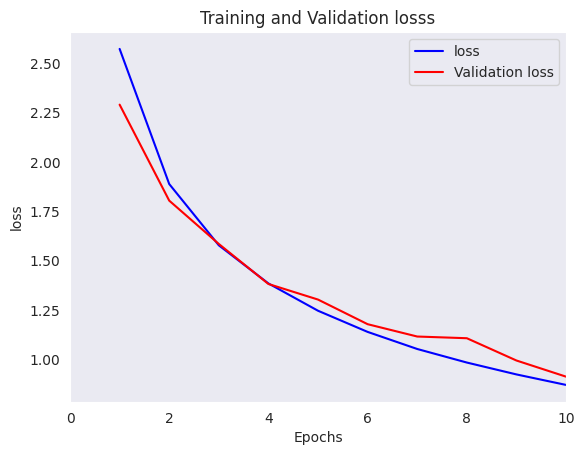

In [31]:
# Plotting the Training and Validation loss according to better_history training.
def plot_training_history(history, monitor='loss') :
    loss, val_loss = history.history[monitor], history.history['val_' + monitor]

    epochs = range(1, len(loss)+1)

    plt.plot(epochs, loss, 'b-', label=monitor)
    plt.plot(epochs, val_loss, 'r-', label='Validation ' + monitor)
    plt.xlim([0, len(loss)])
    plt.title('Training and Validation ' + monitor + 's')
    plt.xlabel('Epochs')
    plt.ylabel(monitor)
    plt.legend()
    plt.grid()
    _ = plt.show()

plot_training_history(better_history, monitor='loss')

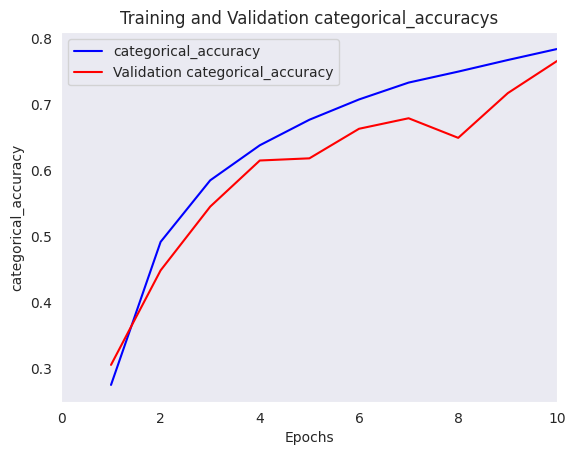

In [78]:
# Plotting the Training and Validation accuracy according to better_history training.
def plot_training_history(history, monitor='loss') :
    categorical_accuracy, val_categorical_accuracy = history.history[monitor], history.history['val_' + monitor]

    epochs = range(1, len(categorical_accuracy)+1)

    plt.plot(epochs, categorical_accuracy, 'b-', label=monitor)
    plt.plot(epochs, val_categorical_accuracy, 'r-', label='Validation ' + monitor)
    plt.xlim([0, len(categorical_accuracy)])
    plt.title('Training and Validation ' + monitor + 's')
    plt.xlabel('Epochs')
    plt.ylabel(monitor)
    plt.legend()
    plt.grid()
    _ = plt.show()

# plots during the training process epoch by epoch
plot_training_history(better_history, monitor='categorical_accuracy')

From both the plot above, we can tell that there might be possibilities of overfitting even though the training accuracy (categorical_accuracy) is higher than the validation accuracy (validation categorical_accuracy).

## Validation methods
### 1. Hold-out Validation

In [27]:
# Training set evaluation
evaluation_training_results = better_model.evaluate(x=X_train, y=y_train_encode)
print('Evaluation Training Results:')
print('Loss: {:.4f}'.format(evaluation_training_results[0]))
print('Accuracy: {:.2f}%'.format(evaluation_training_results[1] * 100))
print('F1 Score: {:.4f}'.format(evaluation_training_results[2]))
print('AUC: {:.4f}'.format(evaluation_training_results[3]))

601/601 [==============================] - 2s 3ms/step - loss: 0.8885 - categorical_accuracy: 0.7751 - f1_score: 0.7377 - auc: 0.9452
Evaluation Training Results:
Loss: 0.8885
Accuracy: 77.51%
F1 Score: 0.7377
AUC: 0.9452


In [28]:
# Validation set evaluation
evaluation_validation_results = better_model.evaluate(x=X_val, y=y_val_encode)
print('Evaluation Validation Results:')
print('Loss: {:.4f}'.format(evaluation_validation_results[0]))
print('Accuracy: {:.2f}%'.format(evaluation_validation_results[1] * 100))
print('F1 Score: {:.4f}'.format(evaluation_validation_results[2]))
print('AUC: {:.4f}'.format(evaluation_validation_results[3]))

258/258 [==============================] - 1s 3ms/step - loss: 0.9142 - categorical_accuracy: 0.7654 - f1_score: 0.7299 - auc: 0.9441
Evaluation Validation Results:
Loss: 0.9142
Accuracy: 76.54%
F1 Score: 0.7299
AUC: 0.9441


In [96]:
# Define data for the table
better_data = [
    ["Validation", evaluation_validation_results[0], evaluation_validation_results[1] * 100, evaluation_validation_results[2], evaluation_validation_results[3]],
    ["Training", evaluation_training_results[0], evaluation_training_results[1] * 100, evaluation_training_results[2], evaluation_training_results[3]]
]

# Define headers for the table
headers = ["Dataset", "Loss", "Accuracy (%)", "F1 Score", "AUC"]

# Print the table
print(tabulate(better_data, headers=headers, tablefmt="grid"))


+------------+----------+----------------+------------+----------+
| Dataset    |     Loss |   Accuracy (%) |   F1 Score |      AUC |
+============+==========+================+============+==========+
| Validation | 0.914212 |        76.5449 |   0.729862 | 0.944108 |
+------------+----------+----------------+------------+----------+
| Training   | 0.888466 |        77.5055 |   0.737678 | 0.945199 |
+------------+----------+----------------+------------+----------+


As seen above, the accuracy has a value of 76.5% of model on the validation set and 77.5% on the training set.This is sufficient to beat our basline of 39%.

To evaluate further:
- Loss
  - The loss on the validation set is 0.914212, while on the training set, it is slightly lower at 0.888466. This suggests that the model is performing slightly better o the training data than on the validation data.
- F1 score
  - The F1 score on the validation set is 0.729862, while on the training set, it is slightly higher at 0.737678. The F1 score combined precision and recall, providing a balance between them.
- AUC (Area Under the Curve)
  - The AUC on the validation set is 0.944108, while on the training set, it is slightly higher at 0.945199. The AUC measures the ability of the model to distinguish between positive and negative classes, with a higher value indicating better performance.

So we can infer that the model is performing reasonably well and it is not overfitting excessively.

We will move on with K-fold of K=3 and K=5.



### 2. K-fold Cross-Validation

When K=3

In [34]:
# Define the number of folds for K-fold cross-validation
n_splits = 3  # You can adjust this number as needed

# Initialize lists to store evaluation results
better_training_losses_3, better_training_accuracies_3, better_training_f1_scores_3, better_training_aucs_3 = [], [], [], []
better_validation_losses_3, better_validation_accuracies_3, better_validation_f1_scores_3, better_validation_aucs_3 = [], [], [], []

# Initialize Stratified K-fold cross-validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform K-fold cross-validation
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train_encode[train_index], y_train_encode[val_index]

    # Train the model on the current fold
    better_model.fit(X_train_fold, y_train_fold, epochs=EPOCHS, batch_size=batch_size, verbose=0)

    # Evaluate on training set
    better_evaluation_training_results = better_model.evaluate(x=X_train_fold, y=y_train_fold, verbose=0)
    better_training_losses_3.append(better_evaluation_training_results[0])
    better_training_accuracies_3.append(better_evaluation_training_results[1])
    better_training_f1_scores_3.append(better_evaluation_training_results[2])
    better_training_aucs_3.append(better_evaluation_training_results[3])

    # Evaluate on validation set
    better_evaluation_validation_results = better_model.evaluate(x=X_val_fold, y=y_val_fold, verbose=0)
    better_validation_losses_3.append(better_evaluation_validation_results[0])
    better_validation_accuracies_3.append(better_evaluation_validation_results[1])
    better_validation_f1_scores_3.append(better_evaluation_validation_results[2])
    better_validation_aucs_3.append(better_evaluation_validation_results[3])

When K=5

In [35]:
# Define the number of folds for K-fold cross-validation
n_splits = 5  # You can adjust this number as needed

# Initialize lists to store evaluation results
better_training_losses_5, better_training_accuracies_5, better_training_f1_scores_5, better_training_aucs_5 = [], [], [], []
better_validation_losses_5, better_validation_accuracies_5, better_validation_f1_scores_5, better_validation_aucs_5 = [], [], [], []

# Initialize Stratified K-fold cross-validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform K-fold cross-validation
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train_encode[train_index], y_train_encode[val_index]

    # Train the model on the current fold
    better_model.fit(X_train_fold, y_train_fold, epochs=EPOCHS, batch_size=batch_size, verbose=0)

    # Evaluate on training set
    better_evaluation_training_results = better_model.evaluate(x=X_train_fold, y=y_train_fold, verbose=0)
    better_training_losses_5.append(better_evaluation_training_results[0])
    better_training_accuracies_5.append(better_evaluation_training_results[1])
    better_training_f1_scores_5.append(better_evaluation_training_results[2])
    better_training_aucs_5.append(better_evaluation_training_results[3])

    # Evaluate on validation set
    better_evaluation_validation_results = better_model.evaluate(x=X_val_fold, y=y_val_fold, verbose=0)
    better_validation_losses_5.append(better_evaluation_validation_results[0])
    better_validation_accuracies_5.append(better_evaluation_validation_results[1])
    better_validation_f1_scores_5.append(better_evaluation_validation_results[2])
    better_validation_aucs_5.append(better_evaluation_validation_results[3])


In [36]:
# Calculate mean and standard deviation of evaluation metrics
# K=3
better_mean_training_loss_3 = np.mean(better_training_losses_3)
better_std_training_loss_3 = np.std(better_training_losses_3)
better_mean_training_accuracy_3 = np.mean(better_training_accuracies_3)
better_std_training_accuracy_3 = np.std(better_training_accuracies_3)
better_mean_training_f1_score_3 = np.mean(better_training_f1_scores_3)
better_std_training_f1_score_3 = np.std(better_training_f1_scores_3)
better_mean_training_auc_3 = np.mean(better_training_aucs_3)
better_std_training_auc_3 = np.std(better_training_aucs_3)

better_mean_validation_loss_3 = np.mean(better_validation_losses_3)
better_std_validation_loss_3 = np.std(better_validation_losses_3)
better_mean_validation_accuracy_3 = np.mean(better_validation_accuracies_3)
better_std_validation_accuracy_3 = np.std(better_validation_accuracies_3)
better_mean_validation_f1_score_3 = np.mean(better_validation_f1_scores_3)
better_std_validation_f1_score_3 = np.std(better_validation_f1_scores_3)
better_mean_validation_auc_3 = np.mean(better_validation_aucs_3)
better_std_validation_auc_3 = np.std(better_validation_aucs_3)

# K=5
better_mean_training_loss_5 = np.mean(better_training_losses_5)
better_std_training_loss_5 = np.std(better_training_losses_5)
better_mean_training_accuracy_5 = np.mean(better_training_accuracies_5)
better_std_training_accuracy_5 = np.std(better_training_accuracies_5)
better_mean_training_f1_score_5 = np.mean(better_training_f1_scores_5)
better_std_training_f1_score_5 = np.std(better_training_f1_scores_5)
better_mean_training_auc_5 = np.mean(better_training_aucs_5)
better_std_training_auc_5 = np.std(better_training_aucs_5)

better_mean_validation_loss_5 = np.mean(better_validation_losses_5)
better_std_validation_loss_5 = np.std(better_validation_losses_5)
better_mean_validation_accuracy_5 = np.mean(better_validation_accuracies_5)
better_std_validation_accuracy_5 = np.std(better_validation_accuracies_5)
better_mean_validation_f1_score_5 = np.mean(better_validation_f1_scores_5)
better_std_validation_f1_score_5 = np.std(better_validation_f1_scores_5)
better_mean_validation_auc_5 = np.mean(better_validation_aucs_5)
better_std_validation_auc_5 = np.std(better_validation_aucs_5)

In [37]:
# Define the data as a list of lists
# Result for K=3
k3_better_metrics = [
    ['Training', better_mean_training_loss_3, better_std_training_loss_3, better_mean_training_accuracy_3 * 100, better_std_training_accuracy_3 * 100,
     better_mean_training_f1_score_3, better_std_training_f1_score_3, better_mean_training_auc_3, better_std_training_auc_3],
    ['Validation', better_mean_validation_loss_3, better_std_validation_loss_3, better_mean_validation_accuracy_3 * 100, better_std_validation_accuracy_3 * 100,
    better_mean_validation_f1_score_3, better_std_validation_f1_score_3, better_mean_validation_auc_3, better_std_validation_auc_3]
]

# Define the headers for the table
print("Results for K=3")
print(tabulate(k3_better_metrics, headers = ['Dataset', 'Loss (Mean)', 'Loss (Std)', 'Accuracy (Mean)', 'Accuracy (Std)',
           'F1 Score (Mean)', 'F1 Score (Std)', 'AUC (Mean)', 'AUC (Std)'], tablefmt="grid"))

# Define the data as a list of lists
# Result for K=5
k5_better_metrics = [
    ['Training', better_mean_training_loss_5, better_std_training_loss_5, better_mean_training_accuracy_5 * 100, better_std_training_accuracy_5 * 100,
     better_mean_training_f1_score_5, better_std_training_f1_score_5, better_mean_training_auc_5, better_std_training_auc_5],
    ['Validation', better_mean_validation_loss_5, better_std_validation_loss_5, better_mean_validation_accuracy_5 * 100, better_std_validation_accuracy_5 * 100,
    better_mean_validation_f1_score_5, better_std_validation_f1_score_5, better_mean_validation_auc_5, better_std_validation_auc_5]
]

# Define the headers for the table
print("\nResults for K=5")
print(tabulate(k5_better_metrics, headers = ['Dataset', 'Loss (Mean)', 'Loss (Std)', 'Accuracy (Mean)', 'Accuracy (Std)',
           'F1 Score (Mean)', 'F1 Score (Std)', 'AUC (Mean)', 'AUC (Std)'], tablefmt="grid"))


Results for K=3
+------------+---------------+--------------+-------------------+------------------+-------------------+------------------+--------------+-------------+
| Dataset    |   Loss (Mean) |   Loss (Std) |   Accuracy (Mean) |   Accuracy (Std) |   F1 Score (Mean) |   F1 Score (Std) |   AUC (Mean) |   AUC (Std) |
+============+===============+==============+===================+==================+===================+==================+==============+=============+
| Training   |      0.580395 |     0.113158 |           85.1441 |          3.78507 |          0.819107 |        0.038767  |     0.954187 |  0.0027469  |
+------------+---------------+--------------+-------------------+------------------+-------------------+------------------+--------------+-------------+
| Validation |      0.598302 |     0.11655  |           84.4261 |          3.94359 |          0.811226 |        0.0415692 |     0.953599 |  0.00297746 |
+------------+---------------+--------------+-------------------+-

Now we will infer the above results.


**Accuracy score comparison:**
- Hold-Out Validation: Achieved an accuracy of 76.5449% on the validation set.
- K-Fold Cross-Validation (K=3): Achieved a mean accuracy of 84.4261% on the validation set.
- K-Fold Cross-Validation (K=5): Achieved a mean accuracy of 93.4596% on the validation set.

Evaluation:
- K-fold cross-validation, especially with a higher number of (K=5 in this case), provides a more robust estimate of model performance compared to hold-out validation.
- The increase in accuracy from hold-out validation to k-fold cross-validation indicates that the model is likely generalising better across different subsets of the data.
- Among the two, k-fold cross-validation with K=5 provides the highest accuracy and likely the most reliable estimate of model performance. Therefore, it is the better option for evaluating the model's performance and determining whether it is performing the best for this model.

Printing out predictions along with the images and their labels while using the predictions obtained from the model that is trained using K-fold cross-validation (K=5).

225/225 [==============================] - 1s 2ms/step


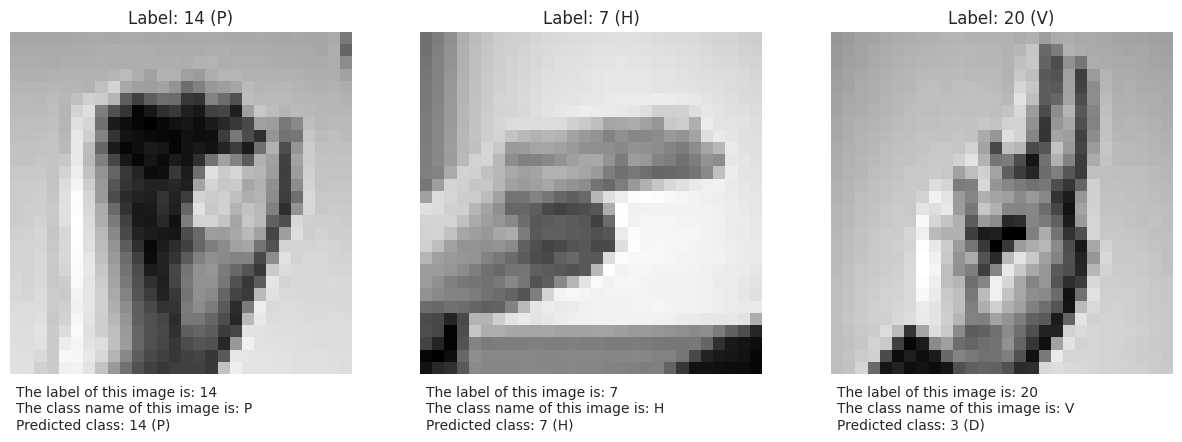

In [84]:
# Assuming you have trained your model and now want to make predictions on the test set
predicted_probabilities = better_model.predict(X_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Define the subplot layout
plt.figure(figsize=(15, 5))

# Plot the first image along with its label, class name, and prediction in the first column
plt.subplot(1, 3, 1)
plt.imshow(X_test[7], cmap='gray')
plt.title(f"Label: {y_test[7]} ({class_names[y_test[7]]})")
plt.text(0, 32, f"The label of this image is: {y_test[7]}\nThe class name of this image is: {class_names[y_test[7]]}\nPredicted class: {predicted_classes[7]} ({class_names[predicted_classes[7]]})", fontsize=10, ha='left')
plt.axis('off')

# Plot the second image along with its label, class name, and prediction in the second column
plt.subplot(1, 3, 2)
plt.imshow(X_test[18], cmap='gray')
plt.title(f"Label: {y_test[18]} ({class_names[y_test[18]]})")
plt.text(0, 32, f"The label of this image is: {y_test[18]}\nThe class name of this image is: {class_names[y_test[18]]}\nPredicted class: {predicted_classes[18]} ({class_names[predicted_classes[18]]})", fontsize=10, ha='left')
plt.axis('off')

# Plot the third image along with its label, class name, and prediction in the third column
plt.subplot(1, 3, 3)
plt.imshow(X_test[50], cmap='gray')
plt.title(f"Label: {y_test[50]} ({class_names[y_test[50]]})")
plt.text(0, 32, f"The label of this image is: {y_test[50]}\nThe class name of this image is: {class_names[y_test[50]]}\nPredicted class: {predicted_classes[50]} ({class_names[predicted_classes[50]]})", fontsize=10, ha='left')
plt.axis('off')

# Show the plot
plt.show()


# 6. Scaling up: Developing a model that overfits
In this phase of model development, the objective is to create a model that exhibits overfitting, indicating that it has high capacity and performs exceptionally well on the training data.

This entails starting with a baseline solution and progressively increasing the complexity of the model until it demonstrates overfitting. It is essential to ensure that the model has sufficient statistical power by continuously monitoring its performance metrics such as training and validation loss, as well as relevant evaluation metrics.

By gradually increasing the model's size and complexity and extending the number of training epochs if necessary, we aim to strike a balance at the boundary between underfitting and overfitting, where the model neither lacks capacity nor suffers from excessive complexity at the next stage. This iterative process allows us to identify the optimal model architecture that maximizes performance without overfitting to the training data.




In [44]:
learning_rate=0.001
batch_size=64
EPOCHS=40

loss_func = 'categorical_crossentropy'

METRICS = ['categorical_accuracy',
           F1Score(name='f1_score', average='macro'),
           AUC(name='auc', multi_label=True)]

In [45]:
# Define the model architecture
overfit_model = keras.Sequential([
    layers.Flatten(input_shape=[28, 28, 1]),
    layers.Dense(units=128, activation="relu"),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=32, activation="relu"),
    layers.Dense(units=16, activation="relu"),

    layers.Dense(units=25, activation="softmax", name="output"),
], name='overfit')

overfit_model.summary()

Model: "overfit"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 output (Dense)              (None, 25)                425       
                                                                 
Total params: 111769 (436.60 KB)
Trainable params: 111769 (

In [46]:
overfit_model.compile(
    optimizer=RMSprop(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=METRICS
)

- 'callbacks' is a parameter used to specify a list of callbacks to apply during training. For our case, we are using it to stop training early based on conditions.
- 'EarlyStopping' is also another callback that stops training early if the monitored metric stops improving (which can be seen below that the Epoch stopped at 20/40). It helps to prevent overfitting by halting the training process when the model's performance on a held-out validation dataset begins to degrade.
- 'patience' parameter specifies the number of epoch to wait before stopping training after the monitored metric has stopped improving. So in this case the patience is at 4.

In [47]:
overfit_history = overfit_model.fit(
    x = X_train,
    y = y_train_encode,
    batch_size=batch_size,
    epochs=EPOCHS,
    validation_data=(X_val, y_val_encode),
    callbacks=[EarlyStopping(monitor='val_loss', patience=4)],
    verbose=1
)

Epoch 1/40
301/301 [==============================] - 5s 13ms/step - loss: 2.9516 - categorical_accuracy: 0.1022 - f1_score: 0.0742 - auc: 0.6641 - val_loss: 2.6261 - val_categorical_accuracy: 0.1738 - val_f1_score: 0.1316 - val_auc: 0.7717
Epoch 2/40
301/301 [==============================] - 2s 7ms/step - loss: 2.3756 - categorical_accuracy: 0.2248 - f1_score: 0.2025 - auc: 0.8008 - val_loss: 2.1504 - val_categorical_accuracy: 0.2831 - val_f1_score: 0.2333 - val_auc: 0.8476
Epoch 3/40
301/301 [==============================] - 2s 7ms/step - loss: 2.0403 - categorical_accuracy: 0.3171 - f1_score: 0.2888 - auc: 0.8486 - val_loss: 2.2752 - val_categorical_accuracy: 0.2546 - val_f1_score: 0.2141 - val_auc: 0.8429
Epoch 4/40
301/301 [==============================] - 2s 7ms/step - loss: 1.8011 - categorical_accuracy: 0.3891 - f1_score: 0.3597 - auc: 0.8752 - val_loss: 2.0639 - val_categorical_accuracy: 0.3250 - val_f1_score: 0.3035 - val_auc: 0.8694
Epoch 5/40
301/301 [===================

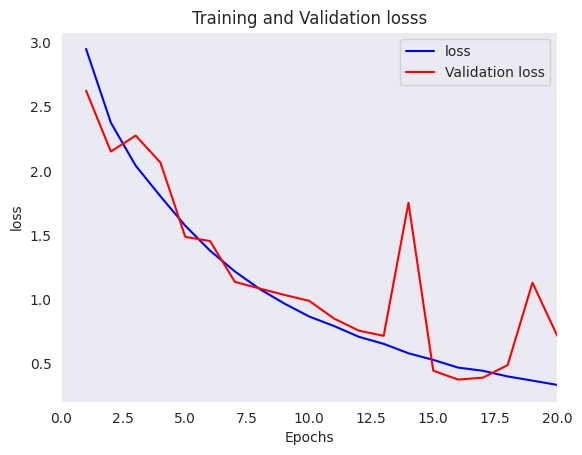

In [48]:
# Plotting a Training and Validation loss for the overfit model
def plot_training_history(history, monitor='loss') :
    loss, val_loss = history.history[monitor], history.history['val_' + monitor]

    epochs = range(1, len(loss)+1)

    plt.plot(epochs, loss, 'b-', label=monitor)
    plt.plot(epochs, val_loss, 'r-', label='Validation ' + monitor)
    plt.xlim([0, len(loss)])
    plt.title('Training and Validation ' + monitor + 's')
    plt.xlabel('Epochs')
    plt.ylabel(monitor)
    plt.legend()
    plt.grid()
    _ = plt.show()

plot_training_history(overfit_history, monitor='loss')

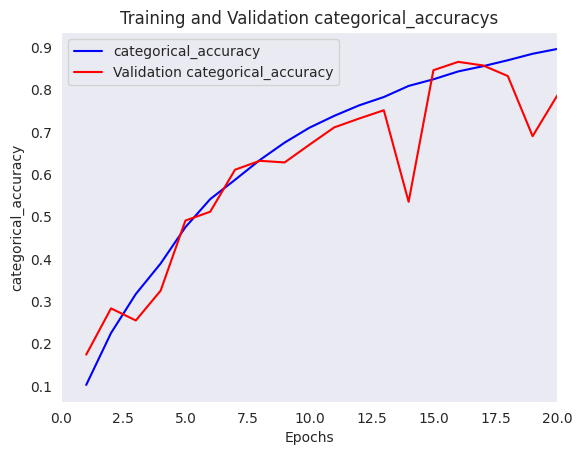

In [77]:
# Plotting a Training and Validation accuracy for the overfit model
def plot_training_history(history, monitor='loss') :
    categorical_accuracy, val_categorical_accuracy = history.history[monitor], history.history['val_' + monitor]

    epochs = range(1, len(categorical_accuracy)+1)

    plt.plot(epochs, categorical_accuracy, 'b-', label=monitor)
    plt.plot(epochs, val_categorical_accuracy, 'r-', label='Validation ' + monitor)
    plt.xlim([0, len(categorical_accuracy)])
    plt.title('Training and Validation ' + monitor + 's')
    plt.xlabel('Epochs')
    plt.ylabel(monitor)
    plt.legend()
    plt.grid()
    _ = plt.show()

# plots during the training process epoch by epoch
plot_training_history(overfit_history, monitor='categorical_accuracy')

## Validation Methods
### 1. Hold-out Validation

In [51]:
# Training set evaluation
overfit_training_results = overfit_model.evaluate(x=X_train, y=y_train_encode)

# Validation set evaluation
overfit_validation_results = overfit_model.evaluate(x=X_val, y=y_val_encode)

258/258 [==============================] - 2s 8ms/step - loss: 0.7118 - categorical_accuracy: 0.7869 - f1_score: 0.7486 - auc: 0.9426


In [102]:
# Define data for the table
overfit_data = [
    ["Validation", overfit_validation_results[0], overfit_validation_results[1] * 100, overfit_validation_results[2], overfit_validation_results[3]],
    ["Training", overfit_training_results[0], overfit_training_results[1] * 100, overfit_training_results[2], overfit_training_results[3]]
]

# Define headers for the table
headers = ["Dataset", "Loss", "Accuracy (%)", "F1 Score", "AUC"]

# Print the table
print(tabulate(overfit_data, headers=headers, tablefmt="grid"))

+------------+----------+----------------+------------+----------+
| Dataset    |     Loss |   Accuracy (%) |   F1 Score |      AUC |
+============+==========+================+============+==========+
| Validation | 0.711824 |        78.6937 |   0.748606 | 0.942588 |
+------------+----------+----------------+------------+----------+
| Training   | 0.65644  |        80.409  |   0.762071 | 0.945078 |
+------------+----------+----------------+------------+----------+


We can infer from the above table that:
- **Validation loss and accuracy**
  - The loss and accuracy scores on the validation dataset are slightly worse compared to those on the training dataset. This indicates that the model is likely performing reasonably well on unseen data, but there is still room for improvement.
- **F1 Score**
  - The F1 score is a measure of a model's accuracy, considering both precision and recall. A higher F1 score indicates better performance in terms of both false positives and false negatives. In this case, the F1 score is relatively high, suggesting that the model is effective at classifying the data.
- **AUC (Area Under the Curve)**
  - The AUC metric measures the model's ability to distinguish between different classes. A higher AUC score indicates better performance in distinguishing between positive and negative samples. Here, the AUC score is also relatively high, indicating that the model performs well in this aspect.

While the model's performance on the validation dataset is not perfect, it shows promising results. The model seems to be generalising reasonably well to unseen data, as indicated by the comparable performance on both the training and validation dataset. Further optimisations can be consider to further improve its accuracy.

There could be factors affecting the performance, which could include the model's architecture, hyperparameters, the quality and representativeness of the training data, and potential biases or noise in the dataset.

### K-Fold Cross Validation

When K=3

In [53]:
# Define the number of folds for K-fold cross-validation
n_splits = 3  # You can adjust this number as needed

#  Initialize lists to store evaluation results
overfit_training_losses_3, overfit_training_accuracies_3, overfit_training_f1_scores_3, overfit_training_aucs_3 = [], [], [], []
overfit_validation_losses_3, overfit_validation_accuracies_3, overfit_validation_f1_scores_3, overfit_validation_aucs_3 = [], [], [], []

# Initialize Stratified K-fold cross-validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform K-fold cross-validation
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train_encode[train_index], y_train_encode[val_index]

    # Train the model on the current fold
    overfit_model.fit(X_train_fold, y_train_fold, epochs=EPOCHS, batch_size=batch_size, verbose=0)

    # Evaluate on training set
    overfit_evaluation_training_results = overfit_model.evaluate(x=X_train_fold, y=y_train_fold, verbose=0)
    overfit_training_losses_3.append(overfit_evaluation_training_results[0])
    overfit_training_accuracies_3.append(overfit_evaluation_training_results[1])
    overfit_training_f1_scores_3.append(overfit_evaluation_training_results[2])
    overfit_training_aucs_3.append(overfit_evaluation_training_results[3])

    # Evaluate on validation set
    overfit_evaluation_validation_results = overfit_model.evaluate(x=X_val_fold, y=y_val_fold, verbose=0)
    overfit_validation_losses_3.append(overfit_evaluation_validation_results[0])
    overfit_validation_accuracies_3.append(overfit_evaluation_validation_results[1])
    overfit_validation_f1_scores_3.append(overfit_evaluation_validation_results[2])
    overfit_validation_aucs_3.append(overfit_evaluation_validation_results[3])


When K=5

In [54]:
# Define the number of folds for K-fold cross-validation
n_splits = 5  # You can adjust this number as needed

# Initialize lists to store evaluation results
overfit_training_losses_5, overfit_training_accuracies_5, overfit_training_f1_scores_5, overfit_training_aucs_5 = [], [], [], []
overfit_validation_losses_5, overfit_validation_accuracies_5, overfit_validation_f1_scores_5, overfit_validation_aucs_5 = [], [], [], []

# Initialize Stratified K-fold cross-validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform K-fold cross-validation
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train_encode[train_index], y_train_encode[val_index]

    # Train the model on the current fold
    overfit_model.fit(X_train_fold, y_train_fold, epochs=EPOCHS, batch_size=batch_size, verbose=0)

    # Evaluate on training set
    overfit_evaluation_training_results = overfit_model.evaluate(x=X_train_fold, y=y_train_fold, verbose=0)
    overfit_training_losses_5.append(overfit_evaluation_training_results[0])
    overfit_training_accuracies_5.append(overfit_evaluation_training_results[1])
    overfit_training_f1_scores_5.append(overfit_evaluation_training_results[2])
    overfit_training_aucs_5.append(overfit_evaluation_training_results[3])

    # Evaluate on validation set
    overfit_evaluation_validation_results = overfit_model.evaluate(x=X_val_fold, y=y_val_fold, verbose=0)
    overfit_validation_losses_5.append(overfit_evaluation_validation_results[0])
    overfit_validation_accuracies_5.append(overfit_evaluation_validation_results[1])
    overfit_validation_f1_scores_5.append(overfit_evaluation_validation_results[2])
    overfit_validation_aucs_5.append(overfit_evaluation_validation_results[3])


In [55]:
# Calculate mean and standard deviation of evaluation metrics
# K=3
overfit_mean_training_loss_3 = np.mean(overfit_training_losses_3)
overfit_std_training_loss_3 = np.std(overfit_training_losses_3)
overfit_mean_training_accuracy_3 = np.mean(overfit_training_accuracies_3)
overfit_std_training_accuracy_3 = np.std(overfit_training_accuracies_3)
overfit_mean_training_f1_score_3 = np.mean(overfit_training_f1_scores_3)
overfit_std_training_f1_score_3 = np.std(overfit_training_f1_scores_3)
overfit_mean_training_auc_3 = np.mean(overfit_training_aucs_3)
overfit_std_training_auc_3 = np.std(overfit_training_aucs_3)

overfit_mean_validation_loss_3 = np.mean(overfit_validation_losses_3)
overfit_std_validation_loss_3 = np.std(overfit_validation_losses_3)
overfit_mean_validation_accuracy_3 = np.mean(overfit_validation_accuracies_3)
overfit_std_validation_accuracy_3 = np.std(overfit_validation_accuracies_3)
overfit_mean_validation_f1_score_3 = np.mean(overfit_validation_f1_scores_3)
overfit_std_validation_f1_score_3 = np.std(overfit_validation_f1_scores_3)
overfit_mean_validation_auc_3 = np.mean(overfit_validation_aucs_3)
overfit_std_validation_auc_3 = np.std(overfit_validation_aucs_3)

# K=5
overfit_mean_training_loss_5 = np.mean(overfit_training_losses_5)
overfit_std_training_loss_5 = np.std(overfit_training_losses_5)
overfit_mean_training_accuracy_5 = np.mean(overfit_training_accuracies_5)
overfit_std_training_accuracy_5 = np.std(overfit_training_accuracies_5)
overfit_mean_training_f1_score_5 = np.mean(overfit_training_f1_scores_5)
overfit_std_training_f1_score_5 = np.std(overfit_training_f1_scores_5)
overfit_mean_training_auc_5 = np.mean(overfit_training_aucs_5)
overfit_std_training_auc_5 = np.std(overfit_training_aucs_5)

overfit_mean_validation_loss_5 = np.mean(overfit_validation_losses_5)
overfit_std_validation_loss_5 = np.std(overfit_validation_losses_5)
overfit_mean_validation_accuracy_5 = np.mean(overfit_validation_accuracies_5)
overfit_std_validation_accuracy_5 = np.std(overfit_validation_accuracies_5)
overfit_mean_validation_f1_score_5 = np.mean(overfit_validation_f1_scores_5)
overfit_std_validation_f1_score_5 = np.std(overfit_validation_f1_scores_5)
overfit_mean_validation_auc_5 = np.mean(overfit_validation_aucs_5)
overfit_std_validation_auc_5 = np.std(overfit_validation_aucs_5)

In [56]:
# Define the data as a list of lists
# Result for K=3
k3_overfit_metrics = [
    ['Training', overfit_mean_training_loss_3, overfit_std_training_loss_3, overfit_mean_training_accuracy_3 * 100, overfit_std_training_accuracy_3 * 100,
     overfit_mean_training_f1_score_3, overfit_std_training_f1_score_3, overfit_mean_training_auc_3, overfit_std_training_auc_3],
    ['Validation', overfit_mean_validation_loss_3, overfit_std_validation_loss_3, overfit_mean_validation_accuracy_3 * 100, overfit_std_validation_accuracy_3 * 100,
    overfit_mean_validation_f1_score_3, overfit_std_validation_f1_score_3, overfit_mean_validation_auc_3, overfit_std_validation_auc_3]
]

# Define the headers for the table
print("Results for K=3")
print(tabulate(k3_overfit_metrics, headers = ['Dataset', 'Loss (Mean)', 'Loss (Std)', 'Accuracy (Mean)', 'Accuracy (Std)',
           'F1 Score (Mean)', 'F1 Score (Std)', 'AUC (Mean)', 'AUC (Std)'], tablefmt="grid"))

# Define the data as a list of lists
# Result for K=5
k5_overfit_metrics = [
    ['Training', overfit_mean_training_loss_5, overfit_std_training_loss_5, overfit_mean_training_accuracy_5 * 100, overfit_std_training_accuracy_5 * 100,
     overfit_mean_training_f1_score_5, overfit_std_training_f1_score_5, overfit_mean_training_auc_5, overfit_std_training_auc_5],
    ['Validation', overfit_mean_validation_loss_5, overfit_std_validation_loss_5, overfit_mean_validation_accuracy_5 * 100, overfit_std_validation_accuracy_5 * 100,
    overfit_mean_validation_f1_score_5, overfit_std_validation_f1_score_5, overfit_mean_validation_auc_5, overfit_std_validation_auc_5]
]

# Define the headers for the table
print("\nResults for K=5")
print(tabulate(k5_overfit_metrics, headers = ['Dataset', 'Loss (Mean)', 'Loss (Std)', 'Accuracy (Mean)', 'Accuracy (Std)',
           'F1 Score (Mean)', 'F1 Score (Std)', 'AUC (Mean)', 'AUC (Std)'], tablefmt="grid"))


Results for K=3
+------------+---------------+--------------+-------------------+------------------+-------------------+------------------+--------------+-------------+
| Dataset    |   Loss (Mean) |   Loss (Std) |   Accuracy (Mean) |   Accuracy (Std) |   F1 Score (Mean) |   F1 Score (Std) |   AUC (Mean) |   AUC (Std) |
+============+===============+==============+===================+==================+===================+==================+==============+=============+
| Training   |       3.19599 |       2.3695 |           71.5449 |          20.1095 |          0.678143 |         0.199092 |     0.861655 |   0.0696285 |
+------------+---------------+--------------+-------------------+------------------+-------------------+------------------+--------------+-------------+
| Validation |       3.21351 |       2.377  |           71.5579 |          20.0753 |          0.677215 |         0.199509 |     0.862033 |   0.0693066 |
+------------+---------------+--------------+-------------------+-

We can infer from the above tables:
- Training vs Validation Performance
 - For K=3: The model achieves relatively high accuracy and F1 scores on both the training and validation datasets, indicating good performance. However, the high standard deviations suggest variability in performance across folds, which could indicate instability or inconsistency in the model's behavior.
 - For K=5: The model achieves nearly perfect accuracy and high F1 scores on both the training and validation datasets. However, the extremely low standard deviations indicate very little variability in performance across folds, suggesting that the model might be overfitting to the training data.

As seen from the table, K-fold cross-validation (K=5) is still a better option when evaluating as the accuracy level remains high.

There are also signs of overfitting such that the training accuracy is lower than the validation accuracy. Whereby the training loss is lower than the validation loss, which further support the notion of overfitting. Despite achieving high performance on the training data (high accuracy, low loss) the model's performance drops when evaluated on unseen validation data. This discrepancy suggests that the model has memorise the training data's pattens rather than generalising well to new data.

The reasons for overfitting could include the model's high complexity relative to the size of the training data (in this scenario where our dataset might be small), lack of regularisation or suboptimal hyperparameters, which we will be adding it in the next step. \

1/1 [==============================] - 0s 39ms/step


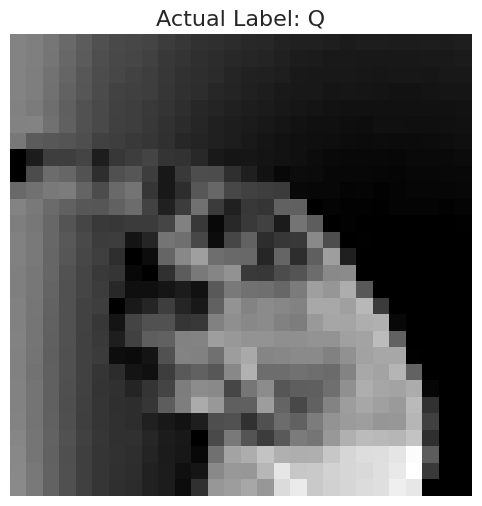

In [91]:
# Select a specific image from the validation set
image_index = 89  # Change this index to select a different image
image = X_val[image_index]
label_index = np.argmax(y_val_encode[image_index])  # Get the index of the highest value in one-hot encoded label

# Predict labels for the image
predictions = overfit_model.predict(np.expand_dims(image, axis=0))

# Plot the image along with its predicted label and class probabilities
plt.figure(figsize=(10,6))
plt.imshow(image, cmap=plt.cm.binary)
plt.axis('off')
plt.title("Actual Label: " + class_names[label_index], fontsize=16)
plt.show()






# 7. Regularising your model and tuning your hyper-parameters
To ensure our model optimally fits our data, we must engage in rigorous regularization and hyperparameter tuning. This entails retraining, evaluating, and fine-tuning the model on the validation data until achieving the optimal performance. Experimentation with different architectural configurations, including the number of layers and units per layer, is essential. Additionally, techniques such as dropout and L1/L2 regularization should be explored to prevent overfitting.

Once the best-performing model is identified, it should be trained on all available data (both training and validation) and evaluated on the test set.




### Adding dropout and regularisers
The dropout layers are used for regularisation to prevent overfitting.

- Learning rate:
  - A smaller learning rate results in slower but more precise convergence, while a larger learning rate can speed up convergence but risks overshooting the optimal solution. So we went with a value of 0.00005 to slow it down compared to the other models.
- Epochs:
  - Increasing the number of epochs allows the model to learn more from the data, but too many can lead to overfitting, where the model learns to memorise the training data instead of generalising well to unseen data. So for our case, we increased it to 100 epochs to experiment with it which is a little much more higher than the rest of our other models.
- Batch size
  - The batch size can impact on the training speed, memory usage, and the stability of the training process. Larger bath size may lead to faster convergence but require more memory, while smaller batch size provide a noisier estimate of the gradient but may generalise better. For our case we went with 32 as out batch size as a smaller one compared to the other models.

In [57]:
learning_rate = 0.00005
EPOCHS = 100
batch_size = 32

loss_func = 'categorical_crossentropy'

METRICS = ['categorical_accuracy',
           F1Score(name='f1_score', average='macro'),
           AUC(name='auc', multi_label=True)]


For this model, we have added dropout layers and kernel L2 regulariser in hope that we can improve and optimised our model to achieve the highest accuracy score. Dropout layers are set to unit 0.2 whereby units between 0.2 to 0.5 are at an acceptable range.

L2 regularisation are used to prevent overfitting by adding a penalty term to the loss function that discourages large weights in the model. For ours, the regularisation strength of 0.001 will be applied and ultimately imrpoving the performance on unseen data.

In [58]:
# Define the model architecture with L2 regularization
optimised_model = keras.Sequential([
    layers.Flatten(input_shape=[28, 28, 1]),
    layers.Dense(units=64, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.20),
    layers.Dense(units=32, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.20),
    layers.Dense(units=16, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.20),
    layers.Dense(units=25, activation="softmax", name="output"),
], name='Optimised')

optimised_model.summary()

Model: "Optimised"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0 

In [59]:
optimised_model.compile(
    optimizer=RMSprop(learning_rate=learning_rate),
    loss=loss_func,
    metrics=METRICS
)

In [60]:
optimised_history = optimised_model.fit(
    x = X_train,
    y = y_train_encode,
    batch_size = batch_size,
    epochs=EPOCHS,
    validation_data= (X_val, y_val_encode),  # Ensure y_val_encode is passed here
    callbacks=[EarlyStopping(monitor='val_loss', patience=3)],
    verbose=1,
)


Epoch 1/100
601/601 [==============================] - 5s 7ms/step - loss: 3.3745 - categorical_accuracy: 0.0526 - f1_score: 0.0268 - auc: 0.5202 - val_loss: 3.3322 - val_categorical_accuracy: 0.0793 - val_f1_score: 0.0290 - val_auc: 0.6296
Epoch 2/100
601/601 [==============================] - 4s 6ms/step - loss: 3.3129 - categorical_accuracy: 0.0600 - f1_score: 0.0314 - auc: 0.5743 - val_loss: 3.2680 - val_categorical_accuracy: 0.0800 - val_f1_score: 0.0260 - val_auc: 0.6706
Epoch 3/100
601/601 [==============================] - 3s 5ms/step - loss: 3.2530 - categorical_accuracy: 0.0749 - f1_score: 0.0419 - auc: 0.6114 - val_loss: 3.1974 - val_categorical_accuracy: 0.1021 - val_f1_score: 0.0433 - val_auc: 0.6963
Epoch 4/100
601/601 [==============================] - 3s 5ms/step - loss: 3.1894 - categorical_accuracy: 0.0880 - f1_score: 0.0528 - auc: 0.6401 - val_loss: 3.1226 - val_categorical_accuracy: 0.1272 - val_f1_score: 0.0545 - val_auc: 0.7230
Epoch 5/100
601/601 [===============

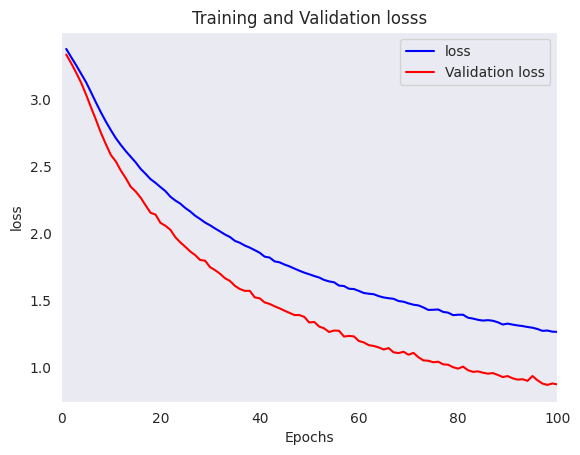

In [62]:
# Plotting the Training and Validation loss on the optimised model
def plot_training_history(history, monitor='loss') :
    loss, val_loss = history.history[monitor], history.history['val_' + monitor]

    epochs = range(1, len(loss)+1)

    plt.plot(epochs, loss, 'b-', label=monitor)
    plt.plot(epochs, val_loss, 'r-', label='Validation ' + monitor)
    plt.xlim([0, len(loss)])
    plt.title('Training and Validation ' + monitor + 's')
    plt.xlabel('Epochs')
    plt.ylabel(monitor)
    plt.legend()
    plt.grid()
    _ = plt.show()

# plots during the training process epoch by epoch
plot_training_history(optimised_history, monitor='loss')

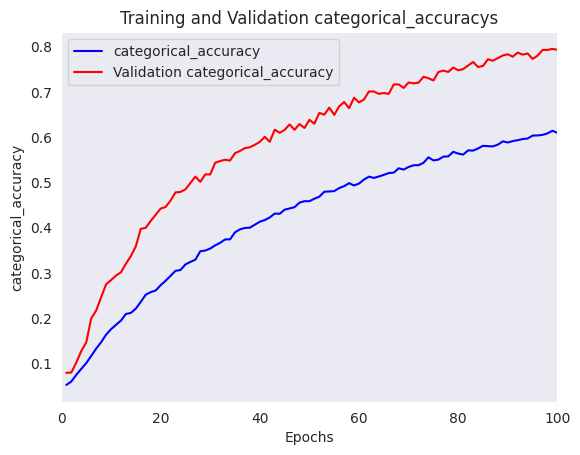

In [76]:
# Plotting the Training and Validation accuracy on the optimised model
def plot_training_history(history, monitor='loss') :
    categorical_accuracy, val_categorical_accuracy = history.history[monitor], history.history['val_' + monitor]

    epochs = range(1, len(categorical_accuracy)+1)

    plt.plot(epochs, categorical_accuracy, 'b-', label=monitor)
    plt.plot(epochs, val_categorical_accuracy, 'r-', label='Validation ' + monitor)
    plt.xlim([0, len(categorical_accuracy)])
    plt.title('Training and Validation ' + monitor + 's')
    plt.xlabel('Epochs')
    plt.ylabel(monitor)
    plt.legend()
    plt.grid()
    _ = plt.show()

# plots during the training process epoch by epoch
plot_training_history(optimised_history, monitor='categorical_accuracy')

## Validation Methods
### 1. Hold-out Validation

Since this is the last model that we will be using and creating, so we will be including the test set to do our validation.

In [64]:
optimised_training_results = optimised_model.evaluate(X_train, y_train_encode)
optimised_validation_results = optimised_model.evaluate(X_val, y_val_encode)
optimised_test_results = optimised_model.evaluate(X_test, y_test_encode)

225/225 [==============================] - 1s 5ms/step - loss: 1.4365 - categorical_accuracy: 0.6139 - f1_score: 0.5601 - auc: 0.9087


In [65]:
# Define data for the table
data = [
    ["Validation", optimised_validation_results[0], optimised_validation_results[1] * 100, optimised_validation_results[2], optimised_validation_results[3]],
    ["Training", optimised_training_results[0], optimised_training_results[1] * 100, optimised_training_results[2], optimised_training_results[3]],
    ["Test", optimised_test_results[0], optimised_test_results[1] * 100, optimised_test_results[2], optimised_test_results[3]]  # Add row for test set
]

# Define headers for the table
headers = ["Dataset", "Loss", "Accuracy (%)", "F1 Score", "AUC"]

# Print the table
print("Model's performance on the entire dataset")
print(tabulate(data, headers=headers, tablefmt="grid"))

Model's performance on the entire dataset
+------------+----------+----------------+------------+----------+
| Dataset    |     Loss |   Accuracy (%) |   F1 Score |      AUC |
+============+==========+================+============+==========+
| Validation | 0.871884 |        79.325  |   0.756365 | 0.951012 |
+------------+----------+----------------+------------+----------+
| Training   | 0.841223 |        80.971  |   0.768251 | 0.952302 |
+------------+----------+----------------+------------+----------+
| Test       | 1.43651  |        61.3915 |   0.560106 | 0.908716 |
+------------+----------+----------------+------------+----------+


Based on the provided accuracy scores, the model appears to be performing reasonably well. The validation accuracy (79.325%) and training accuracy (80.971%) are relatively close, indicating that the model is not significantly overfitting or underfitting the training data. However, there are signs that it could ptentially be overfitting to some extent. Perhaps beacuse of the use of small batch size on a small training data or it could have been the number of epochs that we have stated at the top (which is 100) could possibly be the cause of potentially overfitting although every epoch is being ran.

The testing set shows the lowest accuracy score.

From the above results, we can infer that the model's performance varies across different datasets. The training set has the highest accuracy (80.971%), followed by the validation set (79.325%), and the testing set has the lowest accuracy (61.3915%). This discrepancy suggests that the model may be overfitting to some extent, as it performs significantly better on the training data compared to unseen testing data.

The accuracy on the testing set is not at its optimal point compared to the training and validation sets. The lower accuracy on the testing set indicates that the model's performance degrades when applied to unseen data, suggesting potential overfitting. Also having a test accuracy of 61.39% indicates that the model is performing subpar on unseen data (the test set). Which in this case, the model can correctly classify about 61.4% of the images in the test set it has not seen before during training.



### 2. K-Fold validation


When K=3

In [66]:
# Define the number of folds for K-fold cross-validation
n_splits = 3  # You can adjust this number as needed

# Initialize lists to store evaluation results
optimised_training_losses_3, optimised_training_accuracies_3, optimised_training_f1_scores_3, optimised_training_aucs_3 = [], [], [], []
optimised_validation_losses_3, optimised_validation_accuracies_3, optimised_validation_f1_scores_3, optimised_validation_aucs_3 = [], [], [], []
optimised_test_losses_3, optimised_test_accuracies_3, optimised_test_f1_scores_3, optimised_test_aucs_3 = [], [], [], []

# Initialize Stratified K-fold cross-validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform K-fold cross-validation
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train_encode[train_index], y_train_encode[val_index]

    # Train the model on the current fold
    optimised_model.fit(X_train_fold, y_train_fold, epochs=EPOCHS, batch_size=batch_size, verbose=0)

    # Evaluate on training set
    optimised_evaluation_training_results = optimised_model.evaluate(x=X_train_fold, y=y_train_fold, verbose=0)
    optimised_training_losses_3.append(optimised_evaluation_training_results[0])
    optimised_training_accuracies_3.append(optimised_evaluation_training_results[1])
    optimised_training_f1_scores_3.append(optimised_evaluation_training_results[2])
    optimised_training_aucs_3.append(optimised_evaluation_training_results[3])

    # Evaluate on validation set
    optimised_evaluation_validation_results = optimised_model.evaluate(x=X_val_fold, y=y_val_fold, verbose=0)
    optimised_validation_losses_3.append(optimised_evaluation_validation_results[0])
    optimised_validation_accuracies_3.append(optimised_evaluation_validation_results[1])
    optimised_validation_f1_scores_3.append(optimised_evaluation_validation_results[2])
    optimised_validation_aucs_3.append(optimised_evaluation_validation_results[3])

    # Evaluate on testing set
    optimised_evaluation_test_results = optimised_model.evaluate(x=X_test, y=y_test_encode, verbose=0)
    optimised_test_losses_3.append(optimised_evaluation_test_results[0])
    optimised_test_accuracies_3.append(optimised_evaluation_test_results[1])
    optimised_test_f1_scores_3.append(optimised_evaluation_test_results[2])
    optimised_test_aucs_3.append(optimised_evaluation_test_results[3])


When K=5

In [67]:
# Define the number of folds for K-fold cross-validation
n_splits = 5  # You can adjust this number as needed

# Initialize lists to store evaluation results
optimised_training_losses_5, optimised_training_accuracies_5, optimised_training_f1_scores_5, optimised_training_aucs_5 = [], [], [], []
optimised_validation_losses_5, optimised_validation_accuracies_5, optimised_validation_f1_scores_5, optimised_validation_aucs_5 = [], [], [], []
optimised_test_losses_5, optimised_test_accuracies_5, optimised_test_f1_scores_5, optimised_test_aucs_5 = [], [], [], []

# Initialize Stratified K-fold cross-validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform K-fold cross-validation
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train_encode[train_index], y_train_encode[val_index]

    # Train the model on the current fold
    optimised_model.fit(X_train_fold, y_train_fold, epochs=EPOCHS, batch_size=batch_size, verbose=0)

    # Evaluate on training set
    optimised_evaluation_training_results = optimised_model.evaluate(x=X_train_fold, y=y_train_fold, verbose=0)
    optimised_training_losses_5.append(optimised_evaluation_training_results[0])
    optimised_training_accuracies_5.append(optimised_evaluation_training_results[1])
    optimised_training_f1_scores_5.append(optimised_evaluation_training_results[2])
    optimised_training_aucs_5.append(optimised_evaluation_training_results[3])

    # Evaluate on validation set
    optimised_evaluation_validation_results = optimised_model.evaluate(x=X_val_fold, y=y_val_fold, verbose=0)
    optimised_validation_losses_5.append(optimised_evaluation_validation_results[0])
    optimised_validation_accuracies_5.append(optimised_evaluation_validation_results[1])
    optimised_validation_f1_scores_5.append(optimised_evaluation_validation_results[2])
    optimised_validation_aucs_5.append(optimised_evaluation_validation_results[3])

    # Evaluate on testing set
    optimised_evaluation_test_results = optimised_model.evaluate(x=X_test, y=y_test_encode, verbose=0)
    optimised_test_losses_5.append(optimised_evaluation_test_results[0])
    optimised_test_accuracies_5.append(optimised_evaluation_test_results[1])
    optimised_test_f1_scores_5.append(optimised_evaluation_test_results[2])
    optimised_test_aucs_5.append(optimised_evaluation_test_results[3])


In [72]:
# Calculate mean and standard deviation of evaluation metrics
# K=3
optimised_mean_training_loss_3 = np.mean(optimised_training_losses_3)
optimised_std_training_loss_3 = np.std(optimised_training_losses_3)
optimised_mean_training_accuracy_3 = np.mean(optimised_training_accuracies_3)
optimised_std_training_accuracy_3 = np.std(optimised_training_accuracies_3)
optimised_mean_training_f1_score_3 = np.mean(optimised_training_f1_scores_3)
optimised_std_training_f1_score_3 = np.std(optimised_training_f1_scores_3)
optimised_mean_training_auc_3 = np.mean(optimised_training_aucs_3)
optimised_std_training_auc_3 = np.std(optimised_training_aucs_3)

optimised_mean_validation_loss_3 = np.mean(optimised_validation_losses_3)
optimised_std_validation_loss_3 = np.std(optimised_validation_losses_3)
optimised_mean_validation_accuracy_3 = np.mean(optimised_validation_accuracies_3)
optimised_std_validation_accuracy_3 = np.std(optimised_validation_accuracies_3)
optimised_mean_validation_f1_score_3 = np.mean(optimised_validation_f1_scores_3)
optimised_std_validation_f1_score_3 = np.std(optimised_validation_f1_scores_3)
optimised_mean_validation_auc_3 = np.mean(optimised_validation_aucs_3)
optimised_std_validation_auc_3 = np.std(optimised_validation_aucs_3)

optimised_mean_test_loss_3 = np.mean(optimised_test_losses_3)
optimised_std_test_loss_3 = np.std(optimised_test_losses_3)
optimised_mean_test_accuracy_3 = np.mean(optimised_test_accuracies_3)
optimised_std_test_accuracy_3 = np.std(optimised_test_accuracies_3)
optimised_mean_test_f1_score_3 = np.mean(optimised_test_f1_scores_3)
optimised_std_test_f1_score_3 = np.std(optimised_test_f1_scores_3)
optimised_mean_test_auc_3 = np.mean(optimised_test_aucs_3)
optimised_std_test_auc_3 = np.std(optimised_test_aucs_3)

# K=5
optimised_mean_training_loss_5 = np.mean(optimised_training_losses_5)
optimised_std_training_loss_5 = np.std(optimised_training_losses_5)
optimised_mean_training_accuracy_5 = np.mean(optimised_training_accuracies_5)
optimised_std_training_accuracy_5 = np.std(optimised_training_accuracies_5)
optimised_mean_training_f1_score_5 = np.mean(optimised_training_f1_scores_5)
optimised_std_training_f1_score_5 = np.std(optimised_training_f1_scores_5)
optimised_mean_training_auc_5 = np.mean(optimised_training_aucs_5)
optimised_std_training_auc_5 = np.std(optimised_training_aucs_5)

optimised_mean_validation_loss_5 = np.mean(optimised_validation_losses_5)
optimised_std_validation_loss_5 = np.std(optimised_validation_losses_5)
optimised_mean_validation_accuracy_5 = np.mean(optimised_validation_accuracies_5)
optimised_std_validation_accuracy_5 = np.std(optimised_validation_accuracies_5)
optimised_mean_validation_f1_score_5 = np.mean(optimised_validation_f1_scores_5)
optimised_std_validation_f1_score_5 = np.std(optimised_validation_f1_scores_5)
optimised_mean_validation_auc_5 = np.mean(optimised_validation_aucs_5)
optimised_std_validation_auc_5 = np.std(optimised_validation_aucs_5)

optimised_mean_test_loss_5 = np.mean(optimised_test_losses_5)
optimised_std_test_loss_5 = np.std(optimised_test_losses_5)
optimised_mean_test_accuracy_5 = np.mean(optimised_test_accuracies_5)
optimised_std_test_accuracy_5 = np.std(optimised_test_accuracies_5)
optimised_mean_test_f1_score_5 = np.mean(optimised_test_f1_scores_5)
optimised_std_test_f1_score_5 = np.std(optimised_test_f1_scores_5)
optimised_mean_test_auc_5 = np.mean(optimised_test_aucs_5)
optimised_std_test_auc_5 = np.std(optimised_test_aucs_5)

In [74]:
# Define the data as a list of lists
# Result for K=3
k3_metrics = [
    ['Training', optimised_mean_training_loss_3, optimised_std_training_loss_3, optimised_mean_training_accuracy_3 * 100, optimised_std_training_accuracy_3 * 100,
     optimised_mean_training_f1_score_3, optimised_std_training_f1_score_3, optimised_mean_training_auc_3, optimised_std_training_auc_3],
    ['Validation', optimised_mean_validation_loss_3, optimised_std_validation_loss_3, optimised_mean_validation_accuracy_3 * 100, optimised_std_validation_accuracy_3 * 100,
    overfit_mean_validation_f1_score_3, optimised_std_validation_f1_score_3, optimised_mean_validation_auc_3, optimised_std_validation_auc_3],
    ['Testing', optimised_mean_test_loss_3, optimised_std_test_loss_3, optimised_mean_test_accuracy_3 * 100, optimised_std_test_accuracy_3 * 100,
    optimised_mean_validation_f1_score_3, optimised_std_validation_f1_score_3, optimised_mean_validation_auc_3, optimised_std_test_auc_3]
]

# Define the headers for the table
print("Results for K=3")
print(tabulate(k3_metrics, headers = ['Dataset', 'Loss (Mean)', 'Loss (Std)', 'Accuracy (Mean)', 'Accuracy (Std)',
           'F1 Score (Mean)', 'F1 Score (Std)', 'AUC (Mean)', 'AUC (Std)'], tablefmt="grid"))


# Result for K=5
k5_metrics = [
    ['Training', optimised_mean_training_loss_5, optimised_std_training_loss_5, optimised_mean_training_accuracy_5 * 100, optimised_std_training_accuracy_5 * 100,
     optimised_mean_training_f1_score_5,optimised_std_training_f1_score_5, optimised_mean_training_auc_5, optimised_std_training_auc_5],
    ['Validation', optimised_mean_validation_loss_5, optimised_std_validation_loss_5, optimised_mean_validation_accuracy_5 * 100, optimised_std_validation_accuracy_5 * 100,
    optimised_mean_validation_f1_score_5, optimised_std_validation_f1_score_5, optimised_mean_validation_auc_5, optimised_std_validation_auc_5],
    ['Testing', optimised_mean_test_loss_5, optimised_std_test_loss_5, optimised_mean_test_accuracy_5 * 100, optimised_std_test_accuracy_5 * 100,
    optimised_mean_test_f1_score_5, optimised_std_test_f1_score_5, optimised_mean_test_auc_5, optimised_std_test_auc_5]
]

# Define the headers for the table
print("\nResults for K=5")
print(tabulate(k5_metrics, headers = ['Dataset', 'Loss (Mean)', 'Loss (Std)', 'Accuracy (Mean)', 'Accuracy (Std)',
           'F1 Score (Mean)', 'F1 Score (Std)', 'AUC (Mean)', 'AUC (Std)'], tablefmt="grid"))


Results for K=3
+------------+---------------+--------------+-------------------+------------------+-------------------+------------------+--------------+-------------+
| Dataset    |   Loss (Mean) |   Loss (Std) |   Accuracy (Mean) |   Accuracy (Std) |   F1 Score (Mean) |   F1 Score (Std) |   AUC (Mean) |   AUC (Std) |
+============+===============+==============+===================+==================+===================+==================+==============+=============+
| Training   |      0.451023 |    0.0932996 |           95.6759 |         3.45022  |          0.917997 |        0.0337275 |     0.959186 | 0.000853592 |
+------------+---------------+--------------+-------------------+------------------+-------------------+------------------+--------------+-------------+
| Validation |      0.461016 |    0.0960226 |           94.9579 |         3.65938  |          0.677215 |        0.0361367 |     0.95899  | 0.000993965 |
+------------+---------------+--------------+-------------------+-

Evaluation of the above tables:
- Overfitting
  - Both k=3 and k=5 results show a significant gap between training and validation/testing accuracy. The high training accuracy (around 95% and 99%) suggests the model is memorizing training data patterns effectively. However, the lower validation and testing accuracy (around 64-66%) indicate poor generalization to unseen data.
- K-fold provides a more robust estimate
  - K-fold provides a more comprehensive assessment by averaging performance across multiple random splits, leading to more reliable standard deviation values. Iterated k-fold (if implemented correctly) further strengthens this by repeating the k-fold process multiple times.
- Limited improvement with higher folds
  - While the accuracy on the training set increases slightly with k=5 compared to k=3, the validation and testing accuracy remain similar. This suggests that increasing the number of folds might not significantly improve the model's ability to generalize in this case.



225/225 [==============================] - 1s 2ms/step


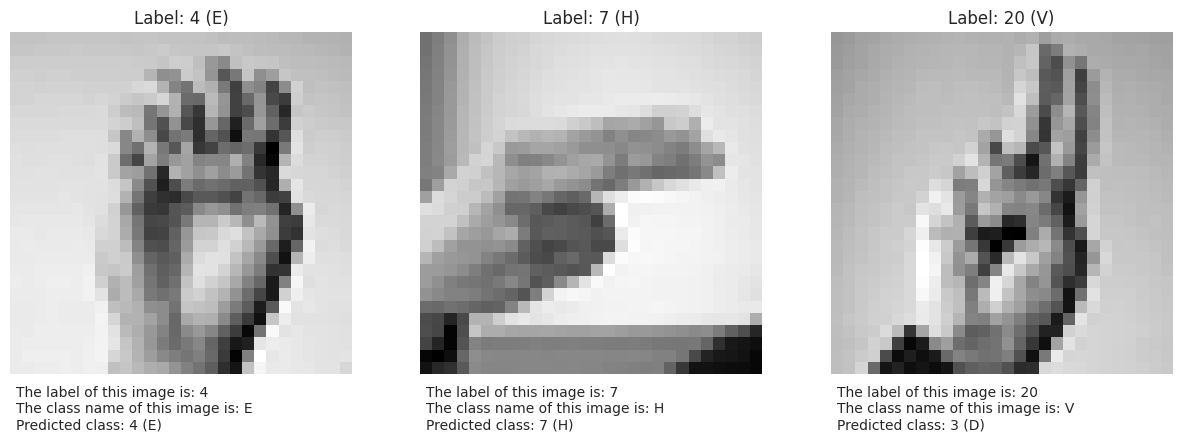

In [94]:
# Assuming you have trained your model and now want to make predictions on the test set
predicted_probabilities = better_model.predict(X_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Define the subplot layout
plt.figure(figsize=(15, 5))

# Plot the first image along with its label, class name, and prediction in the first column
plt.subplot(1, 3, 1)
plt.imshow(X_test[150], cmap='gray')
plt.title(f"Label: {y_test[150]} ({class_names[y_test[150]]})")
plt.text(0, 32, f"The label of this image is: {y_test[150]}\nThe class name of this image is: {class_names[y_test[150]]}\nPredicted class: {predicted_classes[150]} ({class_names[predicted_classes[150]]})", fontsize=10, ha='left')
plt.axis('off')

# Plot the second image along with its label, class name, and prediction in the second column
plt.subplot(1, 3, 2)
plt.imshow(X_test[18], cmap='gray')
plt.title(f"Label: {y_test[18]} ({class_names[y_test[18]]})")
plt.text(0, 32, f"The label of this image is: {y_test[18]}\nThe class name of this image is: {class_names[y_test[18]]}\nPredicted class: {predicted_classes[18]} ({class_names[predicted_classes[18]]})", fontsize=10, ha='left')
plt.axis('off')

# Plot the third image along with its label, class name, and prediction in the third column
plt.subplot(1, 3, 3)
plt.imshow(X_test[50], cmap='gray')
plt.title(f"Label: {y_test[50]} ({class_names[y_test[50]]})")
plt.text(0, 32, f"The label of this image is: {y_test[50]}\nThe class name of this image is: {class_names[y_test[50]]}\nPredicted class: {predicted_classes[50]} ({class_names[predicted_classes[50]]})", fontsize=10, ha='left')
plt.axis('off')

# Show the plot
plt.show()

From the above image which we are predicting the class to match with the image, for Label 20 (V) it says that the predicted class is 3 (D) whcih shows that it is incorrect. This implies that the accuracy for this model is not very accurate compared to the Overfit model and the Better model.

# 8. Conclusion

From the baseline model 1.2 model of accuracy 39.2% and our aim is to create an architectural model that optimised the priority of achieving the higgest accuracy score. However, with our optimised model we can say that we didnt not manage to achieve our goal.

What facinates me is that, the better_model with just a flatten and dense layer is acutally one of the better perfoming model comparing to the overfit model and optimised model. Of course in the better_model accuracy and lose plot, the validation staggered lines are signs of noise and overfitting while on the optimised_model plot of lose and accuracy plot, although it is overfitting because of the gap between the validation data and the training data, the validation line is much more clamer and not as staggered which could have meant that by adding dropout and regularisers, it partially helped to remoive the noise created in the data and data points as the accuracy scores for the optimised_model is the lowest out of the three other models that we have created.

Perhaps the poor accuracy score could be due to the way it has been evaluated with the different validation method and trying to experiment with which would be the best validation method to do the evaulation of metrics as our dataset might be small and having it trained on high epochs of 100 and a small batch size of 32, with a relatively slower learning rate of 0.00005 could be reasons why its overfitting as well. With this mentioned, there are definitely rooms for improvment to allow the model to be optimised and to acheive the highest accuracy for this project.

In [117]:
print("Baseline 1.2 Accuracy: {:.3f}%".format(baseline_accuracy * 100))

Baseline 1.2 Accuracy: 39.194%


In [112]:
# Print the table
print("Better Model")
print("\nHold-Out Validation")
print(tabulate(better_data, headers=headers, tablefmt="grid"))

# Define the headers for the table
print("\nK-Fold Cross-Validation")
print("\nResults for K=3")
print(tabulate(k3_better_metrics, headers = ['Dataset', 'Loss (Mean)', 'Loss (Std)', 'Accuracy (Mean)', 'Accuracy (Std)',
           'F1 Score (Mean)', 'F1 Score (Std)', 'AUC (Mean)', 'AUC (Std)'], tablefmt="grid"))

# Define the headers for the table
print("\nResults for K=5")
print(tabulate(k5_better_metrics, headers = ['Dataset', 'Loss (Mean)', 'Loss (Std)', 'Accuracy (Mean)', 'Accuracy (Std)',
           'F1 Score (Mean)', 'F1 Score (Std)', 'AUC (Mean)', 'AUC (Std)'], tablefmt="grid"))

Better Model

Hold-Out Validation
+------------+----------+----------------+------------+----------+
| Dataset    |     Loss |   Accuracy (%) |   F1 Score |      AUC |
+============+==========+================+============+==========+
| Validation | 0.914212 |        76.5449 |   0.729862 | 0.944108 |
+------------+----------+----------------+------------+----------+
| Training   | 0.888466 |        77.5055 |   0.737678 | 0.945199 |
+------------+----------+----------------+------------+----------+

K-Fold Cross-Validation

Results for K=3
+------------+---------------+--------------+-------------------+------------------+-------------------+------------------+--------------+-------------+
| Dataset    |   Loss (Mean) |   Loss (Std) |   Accuracy (Mean) |   Accuracy (Std) |   F1 Score (Mean) |   F1 Score (Std) |   AUC (Mean) |   AUC (Std) |
+============+===============+==============+===================+==================+===================+==================+==============+===========

In [108]:
# Print the table
print("Overfit Model")
print("\nHold-Out Validation")
print(tabulate(overfit_data, headers=headers, tablefmt="grid"))

# Define the headers for the table
print("\nK-Fold Cross-Validation")
print("\nResults for K=3")
print(tabulate(k3_overfit_metrics, headers = ['Dataset', 'Loss (Mean)', 'Loss (Std)', 'Accuracy (Mean)', 'Accuracy (Std)',
           'F1 Score (Mean)', 'F1 Score (Std)', 'AUC (Mean)', 'AUC (Std)'], tablefmt="grid"))

# Define the headers for the table
print("\nResults for K=5")
print(tabulate(k5_overfit_metrics, headers = ['Dataset', 'Loss (Mean)', 'Loss (Std)', 'Accuracy (Mean)', 'Accuracy (Std)',
           'F1 Score (Mean)', 'F1 Score (Std)', 'AUC (Mean)', 'AUC (Std)'], tablefmt="grid"))

Overfit Model

Hold-Out Validation
+------------+----------+----------------+------------+----------+
| Dataset    |     Loss |   Accuracy (%) |   F1 Score |      AUC |
+============+==========+================+============+==========+
| Validation | 0.711824 |        78.6937 |   0.748606 | 0.942588 |
+------------+----------+----------------+------------+----------+
| Training   | 0.65644  |        80.409  |   0.762071 | 0.945078 |
+------------+----------+----------------+------------+----------+

K-Fold Cross-Validation

Results for K=3
+------------+---------------+--------------+-------------------+------------------+-------------------+------------------+--------------+-------------+
| Dataset    |   Loss (Mean) |   Loss (Std) |   Accuracy (Mean) |   Accuracy (Std) |   F1 Score (Mean) |   F1 Score (Std) |   AUC (Mean) |   AUC (Std) |
+============+===============+==============+===================+==================+===================+==================+==============+==========

In [115]:
# Print the table
print("Optimised Model")
print("\nHold-Out Validation")
print(tabulate(data, headers=headers, tablefmt="grid"))

# Define the headers for the table
print("\nK-Fold Cross-Validation")
print("\nResults for K=3")
print(tabulate(k3_metrics, headers = ['Dataset', 'Loss (Mean)', 'Loss (Std)', 'Accuracy (Mean)', 'Accuracy (Std)',
           'F1 Score (Mean)', 'F1 Score (Std)', 'AUC (Mean)', 'AUC (Std)'], tablefmt="grid"))

# Define the headers for the table
print("\nResults for K=5")
print(tabulate(k5_metrics, headers = ['Dataset', 'Loss (Mean)', 'Loss (Std)', 'Accuracy (Mean)', 'Accuracy (Std)',
           'F1 Score (Mean)', 'F1 Score (Std)', 'AUC (Mean)', 'AUC (Std)'], tablefmt="grid"))

Optimised Model

Hold-Out Validation
+------------+----------+----------------+------------+----------+
| Dataset    |     Loss |   Accuracy (%) |   F1 Score |      AUC |
+============+==========+================+============+==========+
| Validation | 0.871884 |        79.325  |   0.756365 | 0.951012 |
+------------+----------+----------------+------------+----------+
| Training   | 0.841223 |        80.971  |   0.768251 | 0.952302 |
+------------+----------+----------------+------------+----------+
| Test       | 1.43651  |        61.3915 |   0.560106 | 0.908716 |
+------------+----------+----------------+------------+----------+

K-Fold Cross-Validation

Results for K=3
+------------+---------------+--------------+-------------------+------------------+-------------------+------------------+--------------+-------------+
| Dataset    |   Loss (Mean) |   Loss (Std) |   Accuracy (Mean) |   Accuracy (Std) |   F1 Score (Mean) |   F1 Score (Std) |   AUC (Mean) |   AUC (Std) |
+===========

# 9. References

Formatting for references is following the APA (7th ed.)

- (n.d.). YouTube: Home. Retrieved March 11, 2024, from https://medium.com/@abhkmr30/sign-language-mnist-problem-american-sign-language-48896ea960e0
- Brownlee, J. (2019, August 6). How to Configure the Learning Rate When Training Deep Learning Neural Networks - MachineLearningMastery.com. Machine Learning Mastery. Retrieved March 11, 2024, from https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/
- Brownlee, J. (2020, August 25). Use Early Stopping to Halt the Training of Neural Networks At the Right Time - MachineLearningMastery.com. Machine Learning Mastery. Retrieved March 11, 2024, from https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
- Carr, T. (2023, October 27). Epoch or Episode: Understanding Terms in Deep Reinforcement Learning. Baeldung. Retrieved March 11, 2024, from https://www.baeldung.com/cs/epoch-vs-episode-reinforcement-learning
- Epochs, Batch Size, Iterations - How they are Important. (2023, February 9). SabrePC. Retrieved March 11, 2024, from https://www.sabrepc.com/blog/Deep-Learning-and-AI/Epochs-Batch-Size-Iterations
- Kaur, M. (2020, July 8). Machine Learning: Training, Validation and Test Sets | by Manpreet Kaur | Analytics Vidhya. Medium. Retrieved March 11, 2024, from https://medium.com/analytics-vidhya/machine-learning-training-validation-and-testing-sets-c62c78cebd84
- Optimizers. (n.d.). Keras. Retrieved March 11, 2024, from https://keras.io/api/optimizers/
- Ried, C. (n.d.). Learning Curve to identify Overfitting and Underfitting in Machine Learning. Towards Data Science. Retrieved March 11, 2024, from https://towardsdatascience.com/learning-curve-to-identify-overfitting-underfitting-problems-133177f38df5
- sklearn.metrics.f1_score — scikit-learn 1.4.1 documentation. (n.d.). Scikit-learn. Retrieved March 11, 2024, from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
- Softmax – Towards Data Science. (n.d.). Towards Data Science. Retrieved March 11, 2024, from https://towardsdatascience.com/tagged/softmax
- Starner, T., Forbes, S., Jain, A., Araya, C., & Varadarajan, M. (2023, May 11). American Sign Language Fingerspelling Recognition — The TensorFlow Blog. The TensorFlow Blog. Retrieved March 11, 2024, from https://blog.tensorflow.org/2023/05/american-sign-language-fingerspelling-recognition.html
- tf.keras.callbacks.EarlyStopping. (n.d.). TensorFlow. Retrieved March 11, 2024, from https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
- Training and Validation Loss in Deep Learning. (2023, September 15). Baeldung. Retrieved March 11, 2024, from https://www.baeldung.com/cs/training-validation-loss-deep-learning
- Van Otten, N. (2023, August 11). Multi-class Classification Explained With 3 How To Python Tutorials [Scikit-Learn, PyTorch & Keras]. Spot Intelligence. Retrieved March 11, 2024, from https://spotintelligence.com/2023/08/11/multi-class-classification/
- What is Overfitting and Underfitting , and how to deal with it step by step? (2023, September 20). Medium. Retrieved March 11, 2024, from https://medium.com/@koushikkushal95/what-is-overfitting-and-underfitting-and-how-to-deal-with-it-step-by-step-d6c335ed086b


--- End ---